# Исследование данных по рынку компьютерных игр

**Цель исследования**: выявить определяющие успешность игры закономерности посредством исследовательского и статистического анализа данных.

**План работы**:
1. Предобработка данных
 - Получим общую информацию о файле с данными
 - Заменим названия столбцов
 - Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему
 - Обработаем пропуски
 - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
2. Исследовательский анализ данных по продажам
 - Изучим, в какие годы выпуск игр достиг высоких объемов
 - Изучим распределение продаж крупнейших платформ по годам
 - Сравним продажи актуальных платформ. Выберем несколько потенциально прибыльных платформ.
 - Выясним, какие продажи за актуальный период можно считать нормальными, а какие - выбивающимися.
 - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
 - Соотнесем выводы с продажами игр на других платформах.
 - Посмотрим на общее распределение продаж игр по жанрам.
3. Исследовательский анализ данных по пользователям и регионам
 - Определим для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясните разницу.
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
4. Проверим гипотезы по пользовательским рейтингам (пороговое значение alpha зададаим самостоятельно, поясним: Как мы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.)
 - Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
5. Напишем общий вывод

**Описание данных** </br>
Источник данных - 1 файл в формате .csv: `/datasets/games.csv`. </br>
Данные исторические за период до 2016 года, получены из открытых источников. Данные за 2016 год могут быть неполными. </br>
Информация о полях данных: </br>
`Name` — название игры </br>
`Platform` — платформа </br>
`Year_of_Release` — год выпуска </br>
`Genre` — жанр игры </br>
`NA_sales` — продажи в Северной Америке (миллионы проданных копий) </br>
`EU_sales` — продажи в Европе (миллионы проданных копий) </br>
`JP_sales` — продажи в Японии (миллионы проданных копий) </br>
`Other_sales` — продажи в других странах (миллионы проданных копий) </br>
`Critic_Score` — оценка критиков (максимум 100) </br>
`User_Score` — оценка пользователей (максимум 10) </br>
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# **1. Предобработка данных**

In [384]:
# импортируем бибилиотеки и задаем общие настройки
import pandas as pd
import IPython.display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [385]:
# mount google drive on colab
# from google.colab import drive
# drive.mount('/content/drive')

In [386]:
# открываем файл с данными
# path = '/content/drive/MyDrive/Colab files/practicum_project_5/games.csv'
# games = pd.read_csv(path)
games = pd.read_csv('/datasets/games.csv')

## Получим общую информацию о файле с данными

In [387]:
#получим общую информацию
i = games
display('Размер таблицы данных:', i.shape)
display('Формат данных:', i.dtypes)
display('Просмотр первых 10 строк:', i.head(10))

'Размер таблицы данных:'

(16715, 11)

'Формат данных:'

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

'Просмотр первых 10 строк:'

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Наблюдения:
1. У всех столбцов названия не соответстуют стилю `snake_case`
2. У некоторых столбцов задан неподходящий тип данных:
 - `Year_of_Release` установолен `float64`, лучше подходит `int`, т.к. года не могут быть дробными;
 - `User_Score` установолен `object`, но должен быть `float`, т.к. это количественные данные и они могут быть дробными, что видно из первых 10 строк.
3. В столбцах `Critic_Score`, `User_Score`, `Rating` есть пропуски значений, причем они встречаются одновременно в трех столбцах.

## Заменим названия столбцов (приведем к нижнему регистру)

In [388]:
games.columns = games.columns.str.lower()
display(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Преобразуем данные в нужные типы

In [389]:
# преобразуем year_of_release в int
games['year_of_release'] = \
games['year_of_release'].astype('Int64')
display(games['year_of_release'].dtypes)

Int64Dtype()

In [390]:
# преобразуем user_score в float в режиме
# отслеживания ошибок (errors='raise')
try:
  games['user_score'] = pd.to_numeric\
   (games['user_score'], errors='raise')
  display(games['user_score'].dtypes)
except Exception:
  display(ValueError)
  pass
# получили сообщение об ошибке:
# "ValueError: Unable to parse string "tbd" at position 119"

ValueError

In [391]:
# подсчитаем количество нестандартных
# значениий 'tbd' в столбце user_score
display(games.query('user_score == "tbd"')\
 ['platform'].count())

2424

При преобразовании типа данных в столбце `user_score` обнаружили 2424 нестандартных значения `tbd`. Примем решение по обработке этого значения на этапе обработки пропусков.

## Обработаем пропуски

Продолжаем решение вопроса с нестандартным значением `tbd` в столбце `user_score`. Поиск в сети Интернет дает следующее пояснение: </br>
"TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований". </br>
Таким образом, значение по-просту отсутствует, и `tbd` можно заменить на `NaN` для удобства дальнейшей работы.

In [392]:
# преобразуем user_score в float в режиме
# исправление ошибок (errors='coerce'),
# в котором некорректные значения принудительно
# заменяются на NaN.
games_1 = games
games_1['user_score'] = pd.to_numeric\
 (games_1['user_score'], errors='coerce')
display(games_1['user_score'].dtypes)

dtype('float64')

На графике оцениваем масштаб проблемы с пропусками и возможное совпадение % пропущенных значений у разных параметров

In [393]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100) #для расчета процента пропусков в колонке
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
        );
        plt.title('Явные пропуски. Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками', fontsize=22) 
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

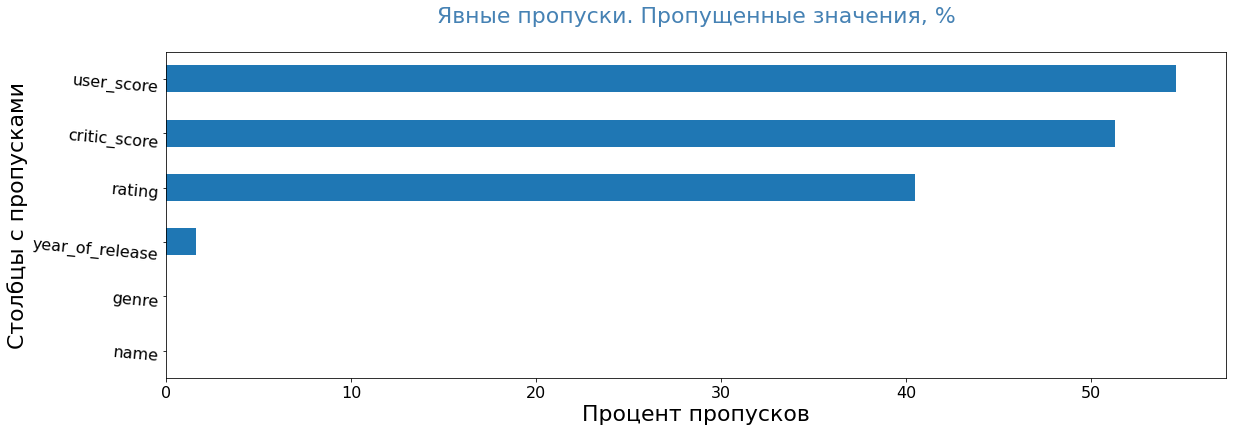

In [394]:
pass_value_barh(games_1)

In [395]:
#определяем, в каких столбцах есть пропуски
display('Количество пропусков:', games_1.isna().sum())
display('Доля пропусков в общем количестве строк, %:', \
        round(games_1.isna().mean()*100, 0))

'Количество пропусков:'

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

'Доля пропусков в общем количестве строк, %:'

name                0.0
platform            0.0
year_of_release     2.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         55.0
rating             40.0
dtype: float64

In [396]:
# просматриваем примеры строк с пропусками для нахождения закономерностей
for i in ['name', 'year_of_release', 'genre', \
          'critic_score', 'user_score', 'rating']:
  display(games_1.query(f'{i}.isna() == True').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [397]:
  # проверяем, насколько значительно количество строк
  # с одновременными пропусками в столбцах с оценками
  # и рейтингами
  display(games_1.query('(critic_score.isna() == True)\
  and (user_score.isna() == True) and \
   (rating.isna() == True)').count())

name               6665
platform           6667
year_of_release    6582
genre              6665
na_sales           6667
eu_sales           6667
jp_sales           6667
other_sales        6667
critic_score          0
user_score            0
rating                0
dtype: int64

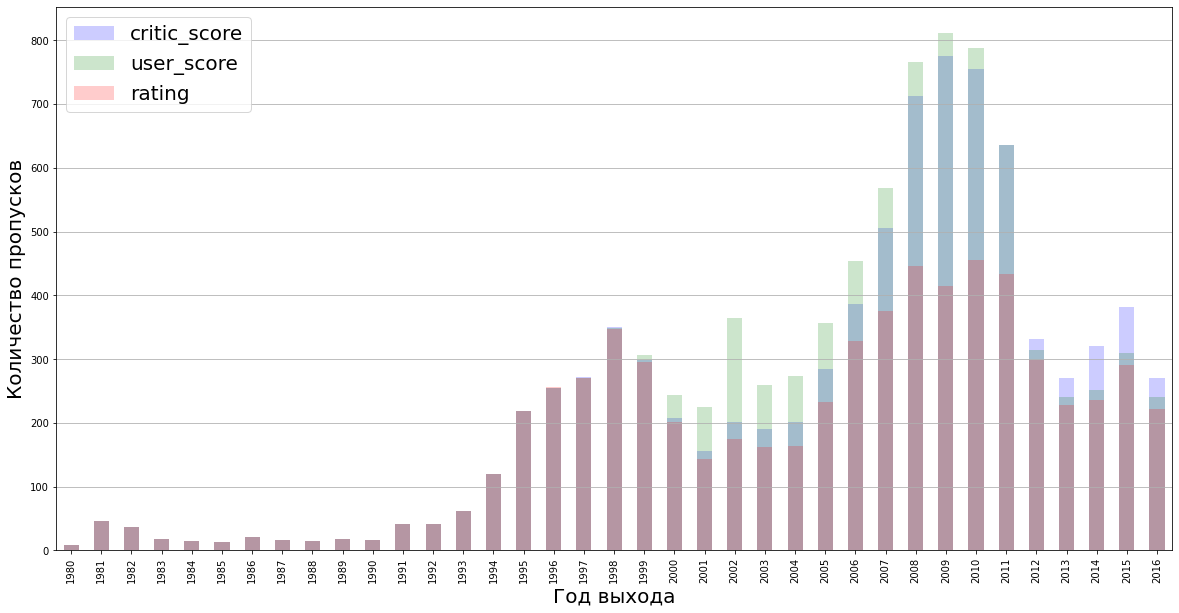

In [398]:
# проверяем, в каких годах встречаются записи
# с пропусками, с помощью графика
leg = []
colors=['b','g','r']
count = 0
for i in ['critic_score', 'user_score', 'rating']:
  ax = games_1.query(f'{i}.isna() == True').\
  groupby('year_of_release')['platform'].count().\
  plot(kind='bar', color=colors[count], alpha=0.2, figsize=(20,10))
  legd = leg.append(i)
  count += 1
ax.set_ylabel('Количество пропусков', size=20)
ax.set_xlabel('Год выхода', size=20)
ax.grid(axis='y')
ax.legend(leg, loc='upper left', fontsize="20")

In [399]:
#удаляем строки с пропусками
games_2 = games_1

for i in ['name', 'year_of_release', 'genre']:
  games_2 = games_2.query(f'{i}.isna() == False')
  display(games_2.query(f'{i}.isna() == True') \
   ['platform'].count())
display(games_2.shape)
display(games_2.head(10))

0

0

0

(16444, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Проверим данные на дубликаты

In [400]:
# проверим на простые дубликаты
display(games_2.duplicated().sum())

0

In [401]:
# проверим на дубликаты названия игр, т.к. они уникальны
display(games_2['name'].duplicated().sum())
display(games_2['name'].value_counts())

5018

Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
Terraria                         8
                                ..
ASH: Archaic Sealed Heat         1
Gift: Prism                      1
Farming Simulator 2011           1
BeatMania IIDX 14 Gold           1
Dragon Ball Z: Shin Butouden     1
Name: name, Length: 11426, dtype: int64

In [402]:
# проверим категориальные переменные name, platform, genre, rating на простые дубликаты с учетом регистра
for i in ['name', 'platform', 'genre', 'rating']:
  games_2[f'{i}_lower'] = games_2[f'{i}'].str.lower()
  display(f'Количество дубликатов {i} первоначальное:',games_2[f'{i}'].duplicated().sum())
  display(f'Количество дубликатов {i} в нижнем регистре:',games_2[f'{i}_lower'].duplicated().sum())
  display(games_2[f'{i}_lower'].value_counts().head(10))

'Количество дубликатов name первоначальное:'

5018

'Количество дубликатов name в нижнем регистре:'

5018

need for speed: most wanted     12
fifa 14                          9
lego marvel super heroes         9
ratatouille                      9
monopoly                         8
angry birds star wars            8
madden nfl 07                    8
lego batman 3: beyond gotham     8
the lego movie videogame         8
lego jurassic world              8
Name: name_lower, dtype: int64

'Количество дубликатов platform первоначальное:'

16413

'Количество дубликатов platform в нижнем регистре:'

16413

ps2     2127
ds      2121
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
Name: platform_lower, dtype: int64

'Количество дубликатов genre первоначальное:'

16432

'Количество дубликатов genre в нижнем регистре:'

16432

action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
Name: genre_lower, dtype: int64

'Количество дубликатов rating первоначальное:'

16435

'Количество дубликатов rating в нижнем регистре:'

16435

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
ao         1
rp         1
Name: rating_lower, dtype: int64

Выяснили:
- дубликатов, вызванных регистром, не обнаружили.  
- обнаружили, что у параметра `rating` есть значения, которые практически не встречаются (10 и менее раз), их необходимо сгруппировать.  
- у параметра `name` есть 5018 дубликатов. Можно предположить, что в датафрейме есть записи с одинаковыми играми для разных платформ. Проверим это. Одновременно случаи, когда у игры есть дубликаты на одной платформе, требуют пристального изучения и устранения избыточных повторов.

In [403]:
# удаляем вспомогательные столбцы
for i in ['name', 'platform', 'genre', 'rating']:
  games_2 = games_2.drop([f'{i}_lower'], axis=1)

In [404]:
#снова выводим рейтинги в оригинальном регистре
display(games_2['rating'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Для группировки редких значения параметра `rating`, изучим значение рейтингов ESRB:
- E (everyone) - все возраста;
- E10+ (everyone 10+) - от 10 лет;
- T (teen) - подростки от 13 лет;
- M (mature) - от 17 лет;
- AO (adults only) - от 18 лет (присоединим к ближайшей категории M);
- RP (rating pending) - рейтинг ожидается; также существовует отдельная категория "рейтинг ожидается 17+" (поэтому у RP ожидаем рейтинг не выше T);
- EC (early childhood) - от 3 лет, устаревшая категория (присоединяем к E);
- K-A (kids to adults) - устаревшее обозначение категории E (присоединяем к E).

In [405]:
#задаем функцию по изменению рейтингов
def rate(x):
    if x == 'AO':
        return 'M'
    if x == 'RP':
        return 'T'
    if x == 'EC' or x == 'K-A':
        return 'E'
    else:
        return x
#применяет функцию и проверяем результат
games_2['rating'] = games_2['rating'].apply(rate)
display(games_2['rating'].value_counts())

E       3932
T       2906
M       1537
E10+    1393
Name: rating, dtype: int64

In [406]:
# выведем таблицу с распределением игр по платформам
name_pivot = games_2.\
pivot_table(index='name', columns='platform', values='na_sales', aggfunc='count')
display(name_pivot.head(10))
display(name_pivot.shape)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'98 Koshien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.1//Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce (jp sales),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(11426, 31)

Первые 10 строк сводной таблицы указывают на проблему неявных дубликатов в именах, например,</br>  
`.hack//G.U. Vol.2//Reminisce` и `.hack//G.U. Vol.2//Reminisce (jp sales)`.</br>  
Для поиска неявных дубликатов эффективным инструментом является алгоритм нечеткого поиска. </br>  
В данном случае ограничимся удалением замеченного неявного дубликата.

In [407]:
games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce (jp sales)', ['name']] = '.hack//G.U. Vol.2//Reminisce'
# Выведем таблицу с распределением игр по платформам
name_pivot = games_2.\
pivot_table(index='name', columns='platform', values='na_sales', aggfunc='count')
display(name_pivot.head(10))
display(name_pivot.shape)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'98 Koshien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.1//Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.3//Redemption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(11425, 31)

Из сводной таблицы видно, что неявных дубликатов среди названий платформ (в заголовках столбов) нет.

In [408]:
# проверим случаи, когда у игры есть дубликаты на одной платформе
name_duplicates = []
for i in name_pivot.index:
    for j in name_pivot.columns:
        if name_pivot.loc[i, j] > 1:
            name_duplicates.append(i)
display(name_duplicates)

['.hack//G.U. Vol.2//Reminisce',
 'Madden NFL 13',
 'Need for Speed: Most Wanted',
 'Need for Speed: Most Wanted']

In [409]:
# выведем записи с играми, которые дублируются в рамках одной платформы
display(games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8597,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN


In [410]:
# устраняем дубликаты по трем играм
games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce',['na_sales']] = 0.11
games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce',['eu_sales']] = 0.09
games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce',['jp_sales']] = 0.16
games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce',['other_sales']] = 0.03
display(games_2.loc[games_2['name'] == '.hack//G.U. Vol.2//Reminisce'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.16,0.03,NaN,NaN,NaN
8597,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.16,0.03,NaN,NaN,NaN


In [411]:
display(games_2.loc[games_2['name'] == 'Madden NFL 13'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [412]:
games_2.loc[(games_2['name'] == 'Madden NFL 13') & (games_2['platform'] == 'PS3'),['na_sales']] = 2.11
games_2.loc[(games_2['name'] == 'Madden NFL 13') & (games_2['platform'] == 'PS3'),['eu_sales']] = 0.22 + 0.01
games_2.loc[(games_2['name'] == 'Madden NFL 13') & (games_2['platform'] == 'PS3'),['jp_sales']] = 0.0
games_2.loc[(games_2['name'] == 'Madden NFL 13') & (games_2['platform'] == 'PS3'),['other_sales']] = 0.03
display(games_2.loc[games_2['name'] == 'Madden NFL 13'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.03,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.03,83.0,5.5,E


In [413]:
display(games_2.loc[games_2['name'] == 'Need for Speed: Most Wanted'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Поиск в сети дал информацию, что в 2012 году вышла новая игра, которая является новым прочтением игры 1995 г.  (https://ru.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted#Need_for_Speed:_Most_Wanted_(2012)) 
Чтобы различать игры, добавим в название игры год 2012.

In [414]:
games_2.loc[(games_2['name'] == \
             'Need for Speed: Most Wanted') & \
            (games_2['year_of_release'] == 2012),\
            ['name']] = 'Need for Speed: Most Wanted 2012'
display(games_2.loc[games_2['name'] == 'Need for Speed: Most Wanted'])
display(games_2.loc[games_2['name'] == 'Need for Speed: Most Wanted 2012'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
523,Need for Speed: Most Wanted 2012,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted 2012,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
2048,Need for Speed: Most Wanted 2012,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
11715,Need for Speed: Most Wanted 2012,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


In [415]:
#удаляем образовавшиеся 2 полных дубликата
display('before:', games_2.shape)
games_2 = games_2.drop_duplicates()
display('after:', games_2.shape)

'before:'

(16444, 11)

'after:'

(16442, 11)

Понимание того, что:
- в датафрейме есть записи с одинаковыми играми для разных платформ,
- рейтинги ESRB, которые являются возрастными ограничениями, чаще одинаковые для разных платформ,  
- рейтинги ESRB все же как у `Need for Speed: Most Wanted` могут различаться между платформами,
позволяет заполнить пробелы в рейтингах в рамках одной игры, если рейтинг известен хотя бы на одной платформе.  
При этом случаи наличия разных рейтингов игры на платформах будем обрабатывать в случайном порядке, считая что таких игр незначительное количество.

In [416]:
# состаявляем таблицу рейтингов ESRB на основе среза
games_ratings = games_2[['name', 'rating']].dropna().drop_duplicates(subset=['name'], keep='first')
display(games_ratings.head(10))
display(games_ratings.shape)

,name,rating
0,Wii Sports,E
2,Mario Kart Wii,E
3,Wii Sports Resort,E
6,New Super Mario Bros.,E
7,Wii Play,E
8,New Super Mario Bros. Wii,E
11,Mario Kart DS,E
13,Wii Fit,E
14,Kinect Adventures!,E
15,Wii Fit Plus,E


(5997, 2)

In [417]:
games_2 = games_2.merge(games_ratings, on=['name'], how='outer')

In [418]:
def rating(r1, r2):
    if r1 == r1:
        return r1
    if r2 == r2:
        return r2
games_2['united_rating'] = games_2.apply(lambda x: rating(x['rating_x'], x['rating_y']), axis=1)

In [419]:
display(games_2.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_x,rating_y,united_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,E,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,None
2,Super Mario Bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,NaN,None
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E,E
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,E,E
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,None
6,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN,None
7,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN,NaN,None
8,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,E,E
9,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,E,E


In [420]:
# сравниваем количество пропусков До и После переноса рейтингов между платформами
display('Количество пропусков До:', games_2['rating_x'].isna().sum())
games_2['rating'] = games_2['united_rating']
games_2 = games_2.drop(columns=['rating_x', 'rating_y', 'united_rating'])
display(games_2.shape)
display('Количество пропусков После:', games_2['rating'].isna().sum())

'Количество пропусков До:'

6675

(16442, 11)

'Количество пропусков После:'

6258

Таким образом, сократили количество пропусков рейтингов на 417.

Проверим, есть ли игры, представленные больше, чем в одном жанре.

In [421]:
# сначала расределим игры по жанрам в сводной таблице и
# посчитаем количество жанров для каждой игры в столбце #genres
genre_pivot = games_2.pivot_table(index='name', columns='genre', values='platform', aggfunc='count') 
genre_pivot['#genres']=genre_pivot.count(axis=1)
display(genre_pivot.head(10))

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,#genres
name,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
Fire Emblem Fates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
Frozen: Olaf's Quest,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Haikyu!! Cross Team Match!,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
'98 Koshien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
.hack//G.U. Vol.1//Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
.hack//G.U. Vol.2//Reminisce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
.hack//G.U. Vol.3//Redemption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1


In [422]:
# проверим случаи, где #genres > 1
display(genre_pivot.loc[genre_pivot['#genres'] > 1])

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,#genres
name,,,,,,,,,,,,,
Battlezone,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2
Culdcept,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2
Little Busters! Converted Edition,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Steins;Gate: Hiyoku Renri no Darling,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Syndicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,2


Приведем каждую игру к одному жанру по следующему принципу:
- выбираем жанр, в котором игра представлена большее количество раз
- выбираем жанр, отличный от смешанного (Misc)

In [423]:
def genre (x, y):
    if x == 'Battlezone':
        return 'Shooter'
    if x == 'Culdcept':
        return 'Strategy'
    if x == 'Little Busters! Converted Edition':
        return 'Adventure'
    if x == 'Steins;Gate: Hiyoku Renri no Darling':
        return 'Adventure'
    if x == 'Syndicate':
        return 'Shooter'    
    else:
        return y
games_2['genre'] = games_2.apply(lambda x: genre(x['name'], x['genre']), axis=1)

In [424]:
# проверка
# сначала расределим игры по жанрам в сводной таблице и
# посчитаем количество жанров для каждой игры в столбце #genres
genre_pivot = games_2.pivot_table(index='name', columns='genre', values='platform', aggfunc='count') 
genre_pivot['#genres']=genre_pivot.count(axis=1)
# проверим случаи, где #genres > 1
display(genre_pivot.loc[genre_pivot['#genres'] > 1])

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,#genres
name,,,,,,,,,,,,,


Разночтения в жанрах в рамках одной игры - устранены.

##  Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [425]:
games_2['total_sales'] = games_2[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(games_2.sort_values(by='total_sales', \
                             ascending = False).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38
6,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,None,30.26
8,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
10,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
11,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,None,28.31


**Выводы по разделу 1:**
- У всех столбцов названия перевели в стиль `snake_case`.
- У некоторых столбцов изменили тип данных на более подходящий:
 - `Year_of_Release`: `float64` на `int`;
 - `User_Score`: `object` на `float`.
- Обработали пропуски, которые обнаружены в 6 столбцах:
 - в столбце `user_score` обнаружили 2422 нестандартных значения `tbd` от английского To Be Determined (будет определено) или To Be Decided (будет решено). Таким образом, значение по-просту отсутствует, и `tbd` заменили на `NaN` для удобства дальнейшей работы.
 - в `name`, `genre` пропусков всего 2 и они в одних и тех же записях, удалили.
 - в `year_of_release` умеренное количество пропусков = 269, или 2% от количества записей - удалили.
 - в близких по содержанию параметрах `critic_score`, `user_score`, `rating` пропуски:
   - составляют 40-55%,
   - в большинстве случаев (6766) пропуски встречаются одновременно,
   - визуализация на графике показала, что пропуски распределены по всем годам наблюдений, с увеличением среднего количества с 1994 года.
   - пропуски в данных параметрах могли возникнуть либо вместо нулевых (самых низких) значений, либо они были исключены из свободного доступа (данные собраны из открытых источников), либо из-за ошибки при сборе данных (что-то не скопировалось), либо из-за отсутствия ресурсов на сбор информации;
   - удалить строки с пропусками не можем из-за высокой доли этих записей в датафрейме и их присутствия в важных для прогнозирования годах. Заполнить тоже не можем, т.к. нет информации о взаимосвязи с другими параметрами, а заполнение наиболее характерными значениями может привести к большим искажениям при расчете соотношения с другими параметрами.
   - доля сохраненных записей = 16444 / 16715 = 98%.
- Устранили дубликаты: 
  - редкие значения рейтинга ESRB (AO , RP, EC, K-A) сгруппировали с популярными категориями;
  - 4 игры дублировались на одинаковых платформах;
  - при устранении дубликатов узнали, что в наборе данных для одних и тех же игр могут быть разные записи для разных платформ;
  - на основе этой информации, а также предположения что рейтинг игры ESRB чаще всего одинаковый для всех платформ, заполнили 417 пропусков у рейтингованных игр;
  - устранили различающиеся жанры на разных платформах у 5 игр;
- Добавили столбец и рассчитали значения с суммарными продажами во всех регионах.

In [426]:
games_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  Int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           10184 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


# **2. Исследовательский анализ данных по продажам**

## Изучим, в какие годы выпуск игр достиг высоких объемов

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1005
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: platform, dtype: int64

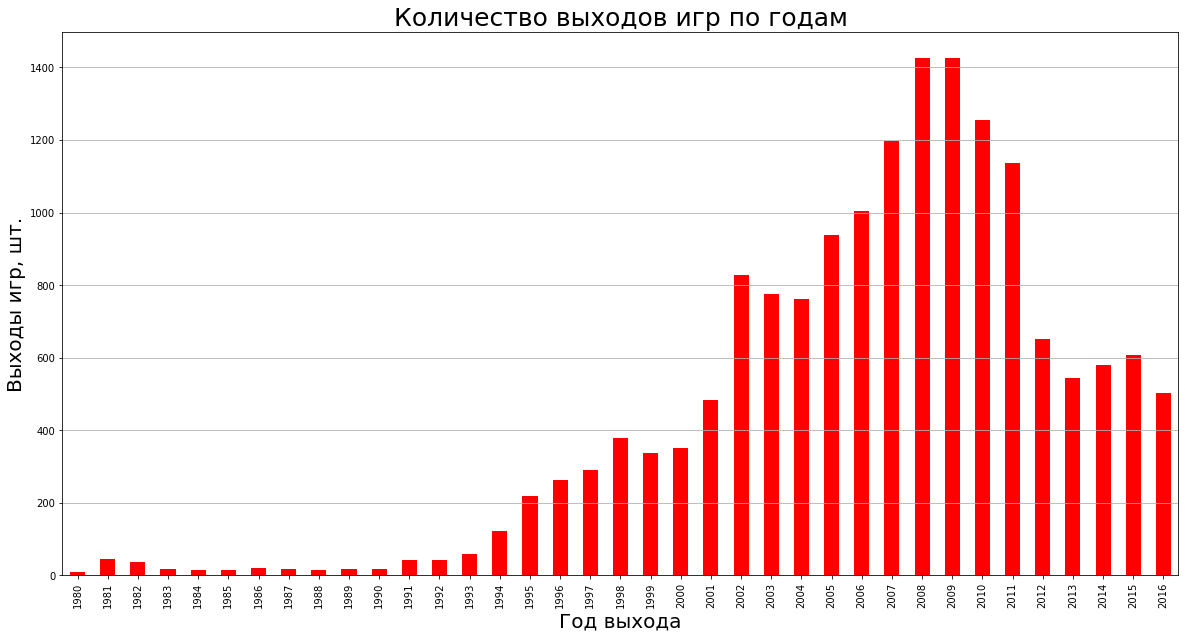

In [427]:
# сгруппируем выпуск игр по годам и визуализируем
# здесь и далее красный цвет используем для графиков
# по рынку в целом
ax = games_2.groupby('year_of_release')['platform'].\
count().plot(kind='bar', color='r', figsize = (20, 10))
ax.set_ylabel('Выходы игр, шт.', size=20)
ax.set_xlabel('Год выхода', size=20)
ax.set_title('Количество выходов игр по годам', size=25)
ax.grid(axis='y')
display(games_2.groupby('year_of_release')\
 ['platform'].count())

In [428]:
# создаем срез для прогнозирования,
# содержащий данные с 1994 года
games_3 = games_2.\
loc[games_2['year_of_release'] > 1993]
games_3.shape

(16077, 12)

Значимыми годами для анализа факторов успеха игр будем считать период с 1994 года. </br>
До 1994 года отсутствовала тенденция к их увеличению, рынок в целом находился в зачаточном состоянии. </br>

## Изучим распределение продаж крупнейших платформ по годам

In [429]:
# сортируем платформы по сумме продаж
platform_sales = games_3.groupby('platform')\
 ['total_sales'].sum().sort_values(ascending=False)
display(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.14
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

Из группировки видно, что крупнейшими можно назвать платформы с продажами от 686, таких 6 единиц. </br>
Для каждой из них визуализируем объемы продаж по годам.

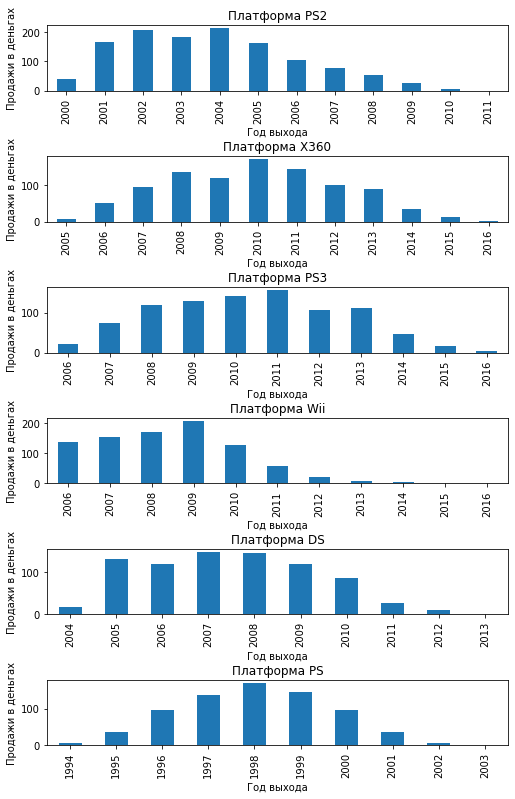

In [430]:
fig, axes = plt.subplots(nrows=6, ncols=1)
count = 0
for i in platform_sales.index[0:6]:
  k = games_3.query(f'platform == "{i}"').\
  groupby('year_of_release')['total_sales'].sum()
  ax = k.plot(kind='bar', ax=axes[count], \
              figsize=(8, 10))
  ax.set_ylabel('Продажи в деньгах', size=10)
  ax.set_title(f'Платформа {i}', size=12)
  ax.set_xlabel('Год выхода', size=10)
  count +=1
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=1,
                    right=0.9,
                    top=2,
                    wspace=0.4,
                    hspace=1)

Вывод:
- отсортировали платформы по совокупным продажам и выяснили, что крупнейшими можно назвать платформы с продажами от 727, таких 6 единиц: `PS2`, `X360`, `Wii`, `PS3`, `DS`, `PS`.
- столбчатые диаграммы распределения продаж по годам для крупнейших платформ показывают:
  - крупнейшие платформы существовали в разные периоды времени;
  - характерный срок жизни платформ равен 10 годам.

## Сравним продажи актуальных платформ. Выберем несколько потенциально прибыльных платформ.

In [431]:
# отсортируем платформы по продажам в 2015 году
# При анализе графиков учитываем особенность, 
# что данные за 2016 год могут быть неполными. </br>
platform_sales_2015 = games_3.loc[games_3['year_of_release']\
                                  == 2015].groupby('platform')['total_sales']\
                                  .sum().sort_values(ascending=False)
display(platform_sales_2015)

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64

Сократим период анализа до последних 10 лет в соответствии с типичным "жизненным циклом" крупнейших платформ.

In [432]:
# создаем срез для прогнозирования
games_4 = games_3.loc[games_2['year_of_release'] > 2005]
games_4.shape

(10331, 12)

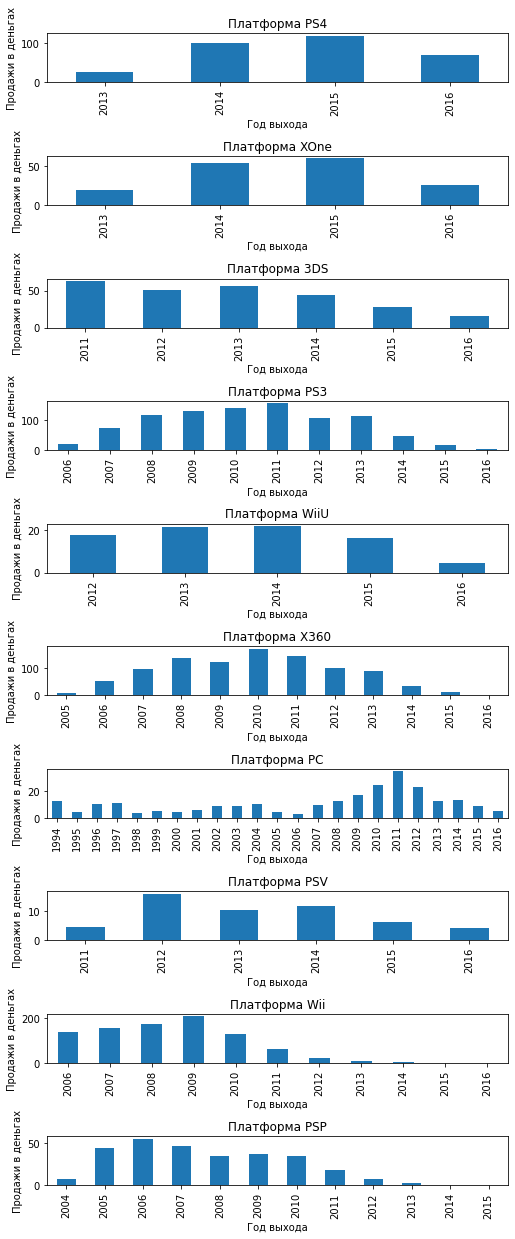

In [433]:
# для действующих платформ построим графики продаж по годам
# и оценим их стадии "жизненного цикла"
fig, axes = plt.subplots(nrows=10, ncols=1)
count = 0
for i in platform_sales_2015.index[0:10]:
  k = games_3.query(f'platform == "{i}"').\
  groupby('year_of_release')['total_sales'].sum()
  ax = k.plot(kind='bar', ax=axes[count], \
              figsize=(8, 16))
  ax.set_ylabel('Продажи в деньгах', size=10)
  ax.set_xlabel('Год выхода', size=10)
  ax.set_title(f'Платформа {i}', size=12)
  count +=1
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=1,
                    right=0.9,
                    top=2,
                    wspace=0.4,
                    hspace=1.5)

Промежуточные выводы по платформам:
- ряд платформ находятся на завершающей стадии 10-летнего "жизненного цикла": `Wii`, `X360`, `PS3`, `PSP`, `PC`;
- у остальных платформ по итогам нескольких лет до 2015 включительно нет выраженной тенденции роста продаж;
- ранее построенный график ежегодного количества релизов на всем рынке показал, что с 2010 года действует нисходящая тенденция. Это дает основание предположить аналогичную тенденцию в объеме продаж, и при такой конъюнктуре успешность актуальных платформ необходимо рассматривать в % от продаж за год, а не в абсолютных значениях;
- платформа `PC` требует дополнительного анализа в силу ее особенности, т.к. она базируется не на специальных устройствах, а на по-прежнему широко используемых ПК. Это дает основание предположить, что снижение продаж для нее не означает полного прекращения деятельности, в отличие от других платформ.

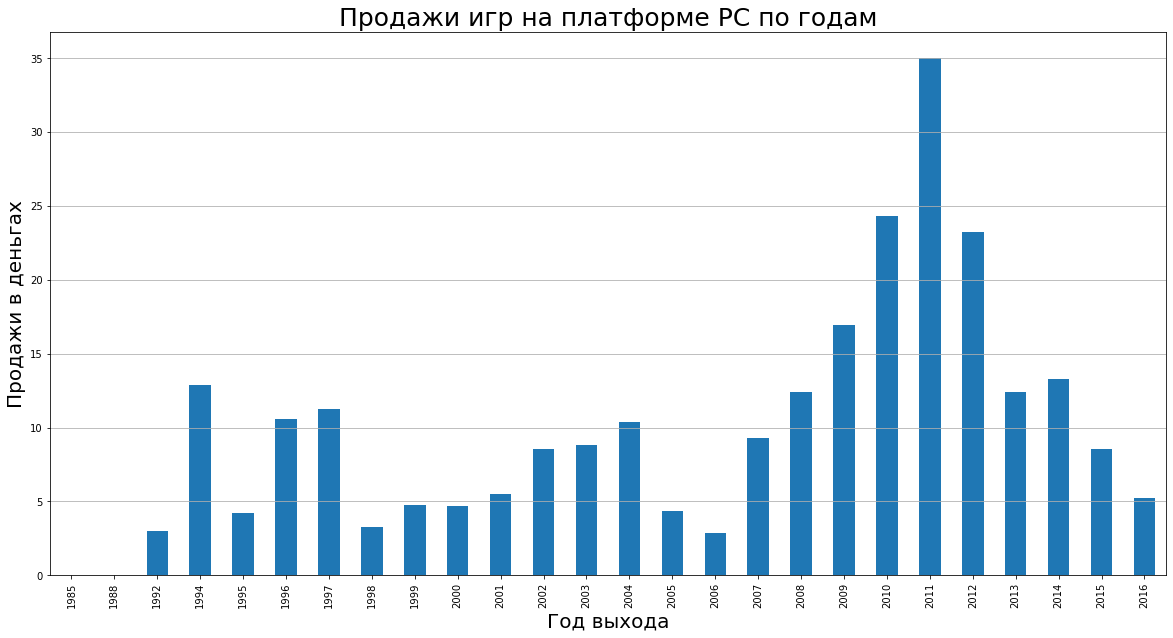

In [434]:
# проверим на графике предположение о более
# длительном существовании платформы PC
# для этого используем датафрейм за всю дступную историю наблюдений
ax = games_2.query('platform == "PC"').\
groupby('year_of_release')['total_sales'].sum().\
plot(kind='bar', figsize = (20, 10))
ax.set_ylabel('Продажи в деньгах', size=20)
ax.set_xlabel('Год выхода', size=20)
ax.set_title('Продажи игр на платформе PC по годам', size=25)
ax.grid(axis='y')

Наблюдения:
- действительно, игровая платформа `PC` существует непрерывно с года начала наблюдений,
- за это время она прошла 2 полных "жизненных цикла", определенных по крупнейшим платформам, и сейчас нахождится предположительно в очередном локальном минимуме;
- таким образом, на 2016 год платформа `PC` перспективная с точки зрения возможности роста, и ее нужно учитывать вместе с другими действующими пратформами.

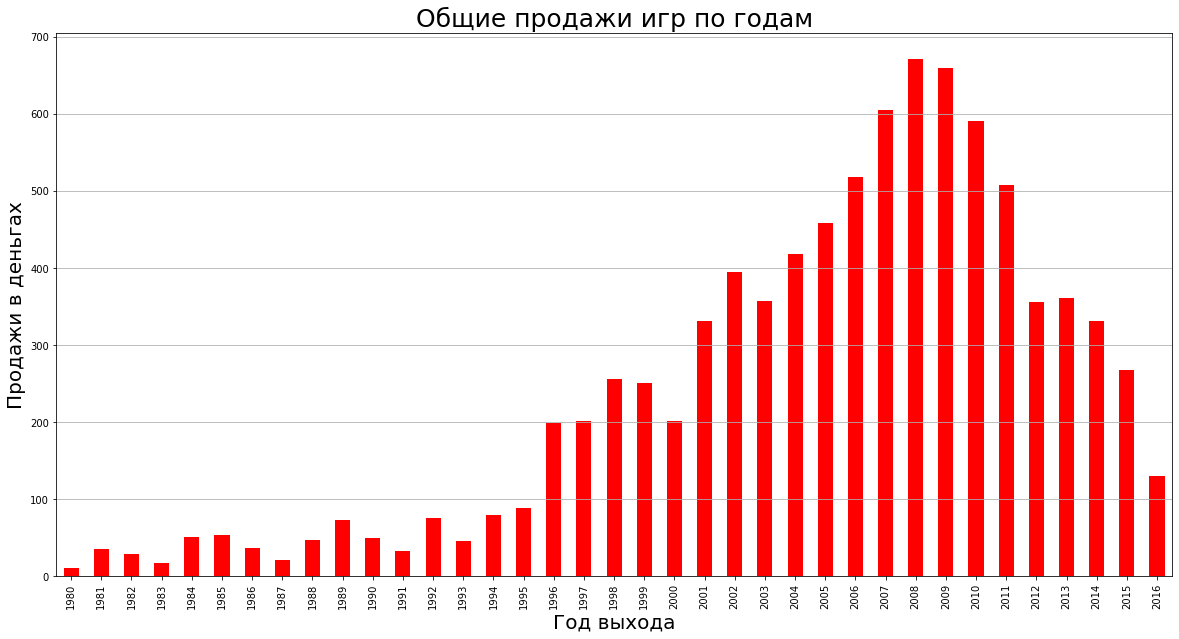

In [435]:
# построим на графике продажи всего рынка игр
# по годам за весь период наблюдения и визуализируем
ax = games_2.groupby('year_of_release')['total_sales']\
.sum().plot(kind='bar', color='r', figsize = (20, 10))
ax.set_ylabel('Продажи в деньгах', size=20)
ax.set_xlabel('Год выхода', size=20)
ax.set_title('Общие продажи игр по годам', size=25)
ax.grid(axis='y')

Предположение об ослабевающей конъюнктуре рынка подтвердилось. </br>
Это обосновывает переход к анализу продаж актуальных платформ в долях от рынка. </br>
Для интересующих нас платформ построим графики с ежегоднями продажами в долях от рынка.

In [436]:
# создадим список потенциально перспективных платформ
# на 2015 год
platform_sales_2015_perspective = platform_sales_2015.\
drop(['Wii', 'PSP'], axis = 0)

In [437]:
# платформы с незначительными продажами объединим в Other
ser = pd.Series([platform_sales_2015.sum() - platform_sales_2015_perspective.sum()], index = ['Other'])
platform_sales_2015_perspective = platform_sales_2015_perspective.append(ser)
display(platform_sales_2015_perspective)

PS4      118.90
XOne      60.14
3DS       27.78
PS3       16.82
WiiU      16.35
X360      11.96
PC         8.52
PSV        6.25
Other      1.26
dtype: float64

In [438]:
# построим сводную таблицу с годовыми продажами
# всех платформ за актуальный период (с 2006 года)
sales_pivot = games_4.pivot_table(index='platform', \
                                  columns='year_of_release', \
                                  values='total_sales', aggfunc='sum')
display(sales_pivot)

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.16,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25


In [439]:
# переведем продажи по платформам в % от годовых продаж
sales_pivot_pct = sales_pivot
for i in sales_pivot.columns:
    sales_pivot_pct[i] = round(sales_pivot[i] / \
                               sales_pivot[i].sum() * 100, 1)
display(sales_pivot_pct)

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,12.5,14.4,15.7,13.2,10.4,11.7
DC,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,23.1,24.3,21.6,18.1,14.4,5.2,3.1,0.4,NaN,NaN,NaN
GBA,1.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,2.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,0.6,1.5,1.8,2.6,4.1,6.9,6.5,3.4,4.0,3.2,4.0
PS2,20.0,12.6,8.0,4.0,1.0,0.1,NaN,NaN,NaN,NaN,NaN
PS3,4.0,12.1,17.7,19.9,24.1,30.9,30.1,31.4,14.4,6.3,2.8
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,30.2,44.4,53.3


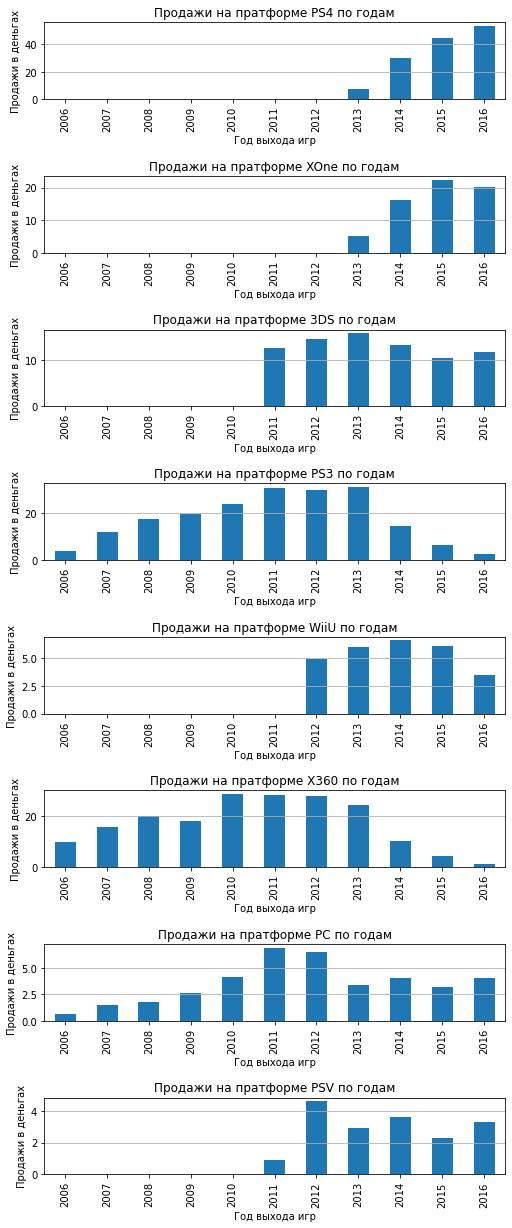

In [440]:
# для 8 потенциально перспективных платформ построим
# графики продаж по годам в % и оценим их стадии
# "жизненного цикла"
fig, axes = plt.subplots(nrows=8, ncols=1)
count = 0
for i in platform_sales_2015_perspective.index[0:8]:
  k = sales_pivot_pct.loc[i,]
  ax = k.plot(kind='bar', ax=axes[count], \
              figsize=(8, 16))
  ax.set_ylabel('Продажи в деньгах', size=10)
  ax.set_xlabel('Год выхода игр', size=10)
  ax.set_title(f'Продажи на пратформе {i} по годам', size=12)
  ax.grid(axis='y')
  count +=1
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=1,
                    right=0.9,
                    top=2,
                    wspace=0.4,
                    hspace=1)

In [441]:
# сокращаем список перспективных платформ в соответствии со стадией жизненного цикла
platform_sales_2015_perspective_short = platform_sales_2015_perspective.\
drop(['PS3', 'X360'], axis = 0)

In [442]:
# платформы на завершающем этапе жизненного цикла присоединим к Other
ser = pd.Series([platform_sales_2015_perspective.sum() - platform_sales_2015_perspective_short.sum()], index = ['Other'])
display(ser)
platform_sales_2015_perspective_short['Other'] += ser
display(platform_sales_2015_perspective_short)

Other    28.78
dtype: float64

PS4      118.90
XOne      60.14
3DS       27.78
WiiU      16.35
PC         8.52
PSV        6.25
Other     30.04
dtype: float64

Представление продаж актуальных платформ в долях от рынка дает нам новые результаты:
- наибольшая и растущая доля рынка у `PS4` (44% за 2015) и `XOne` (22% за 2015);
- у `3DS` сохраняется третье место по доле рынка (10% за 2015) без выраженной тенденции к росту;
- у `PC` в 2015 предположительно завершился очередной 10-летний цикл и в 2016 вероятно начался следующей цикл, т.к. даже с неполными данными за 2016 год доля продаж выросла с 3,2% до 4,0%;
- у остальных платформ нет выраженной тенденции к росту, при этом пройдено более половины жизненного цикла.

## Выясним, какие продажи за актуальный период можно считать нормальными, а какие - выбивающимися.

Построем диаграмму размаха по глобальным продажам игр в разбивке по платформам. </br>
Для сопоставимости продаж при росте и падении рынка используем доли в годовых продажах. </br>
Как ранее установили, актуальный приод - 2015 год.

In [443]:
display(games_4.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
10,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
15,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
16,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
17,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
18,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


In [444]:
# # создадим срез с актуальными платформами,
# # продажами и долями продаж в 2015 году
# display(platform_sales_2015_perspective)

# # замена платформ с незначительными продожами 
# # в 2015 на общую категорию Other
# # вариант 1: удаление всех записей по незначительным 
# # платформам и включение единой записи Other 
# # с суммами продож незначительных платформ
# games_sales_2015 = games_3.loc[games_3['year_of_release'] == 2015]
# games_sales = games_sales_2015.loc[(games_sales_2015['platform'] == 'PS4') |\
#                           (games_sales_2015['platform'] == 'XOne') |\
#                           (games_sales_2015['platform'] == '3DS') |\
#                           (games_sales_2015['platform'] == 'PS3') |\
#                           (games_sales_2015['platform'] == 'WiiU') |\
#                           (games_sales_2015['platform'] == 'PC') |\
#                           (games_sales_2015['platform'] == 'PSV')]

# games_sales.loc[f'{games_sales.index.max() + 1}'] = \
# ['', 'Other', 2015, '', \
# games_sales_2015["na_sales"].sum() - games_sales["na_sales"].sum(),\
# games_sales_2015["eu_sales"].sum() - games_sales["eu_sales"].sum(),\
# games_sales_2015["jp_sales"].sum() - games_sales["jp_sales"].sum(),\
# games_sales_2015["other_sales"].sum() - games_sales["other_sales"].sum(),\
# 0, 0, '',\
# games_sales_2015["total_sales"].sum() - games_sales["total_sales"].sum()]



In [445]:
# вариант 2: переименовываем незначительные платформы на Other
# и они группируются в сводной таблице

# создадим срез с актуальными платформами,
# продажами и долями продаж в 2015 году
display(platform_sales_2015_perspective_short)

platform_sales_2015_perspective_short = pd.DataFrame(platform_sales_2015_perspective_short)
platform_sales_2015_perspective_short['name'] = platform_sales_2015_perspective_short.index
platform_sales_2015_perspective_short = platform_sales_2015_perspective_short.reset_index(drop=True)
display(platform_sales_2015_perspective_short.head(10))

def platform_minor(platform):
    if platform not in platform_sales_2015_perspective_short['name'].unique():
        return 'Other'
    else:
        return platform
games_sales = games_3.loc[games_3['year_of_release'] == 2015]
games_sales['platform'] = games_sales['platform'].apply(platform_minor)
display(games_sales['platform'].value_counts())

PS4      118.90
XOne      60.14
3DS       27.78
WiiU      16.35
PC         8.52
PSV        6.25
Other     30.04
dtype: float64

,0,name
0,118.90,PS4
1,60.14,XOne
2,27.78,3DS
3,16.35,WiiU
4,8.52,PC
5,6.25,PSV
6,30.04,Other


PS4      137
Other    115
PSV      110
3DS       86
XOne      80
PC        50
WiiU      28
Name: platform, dtype: int64

In [446]:
# проверка среза на отсутстсвие записей с нулевыми продажами
display('before dropna',games_sales.shape)
games_sales = games_sales.dropna(subset=['total_sales'])
display('after dropna',games_sales.shape)
display(games_sales.info())
games_sales['total_sales_share'] = games_sales['total_sales'] / games_sales['total_sales'].sum() * 100
# проверка суммы долей
display(games_sales['total_sales_share'].sum())

'before dropna'

(606, 12)

'after dropna'

(606, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 22 to 16399
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             606 non-null    object 
 1   platform         606 non-null    object 
 2   year_of_release  606 non-null    Int64  
 3   genre            606 non-null    object 
 4   na_sales         606 non-null    float64
 5   eu_sales         606 non-null    float64
 6   jp_sales         606 non-null    float64
 7   other_sales      606 non-null    float64
 8   critic_score     225 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           364 non-null    object 
 11  total_sales      606 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 62.1+ KB


None

100.0

In [447]:
# создадим сводную таблицу c долями по играм и платформам за 2015 год 
games_sales_pivot = \
games_sales.pivot_table(
    index='name', 
    columns='platform',
    values='total_sales_share', 
    aggfunc='sum'
)
# зададим порядок столбцов по убыванию продаж платформ в 2015
column_order = platform_sales_2015_perspective_short['name']
games_sales_pivot = games_sales_pivot.reindex(column_order, axis=1)
display(games_sales_pivot.head(10))

name,PS4,XOne,3DS,WiiU,PC,PSV,Other
name,,,,,,,
Fire Emblem Fates,NaN,NaN,0.623181,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,NaN,NaN,NaN,0.070901,0.055974
7 Roses: A Darkness Rises,NaN,NaN,NaN,NaN,0.007463,NaN,NaN
7th Dragon III Code: VFD,NaN,NaN,0.059706,NaN,NaN,NaN,NaN
A Good Librarian Like a Good Shepherd: Library Party,NaN,NaN,NaN,NaN,NaN,0.011195,NaN
Abunai: Koi no Sousa Shitsu,NaN,NaN,NaN,NaN,NaN,0.007463,NaN
Act of Aggression,NaN,NaN,NaN,NaN,0.003732,NaN,NaN
Adventure Time: Finn & Jake Investigations,0.037316,0.018658,0.033585,0.018658,NaN,NaN,0.063438
Aikatsu! My No.1 Stage!,NaN,NaN,0.029853,NaN,NaN,NaN,NaN


name,PS4,XOne,3DS,WiiU,PC,PSV,Other
count,137.000000,80.000000,86.000000,28.000000,50.000000,110.000000,82.000000
mean,0.323861,0.280525,0.120540,0.217900,0.063587,0.021202,0.136705
std,0.693026,0.460808,0.232962,0.376294,0.098302,0.025729,0.263238
min,0.003732,0.003732,0.003732,0.003732,0.003732,0.003732,0.003732
25%,0.026121,0.032652,0.011195,0.018658,0.011195,0.007463,0.008396
50%,0.067169,0.091425,0.033585,0.082096,0.029853,0.011195,0.026121
75%,0.272408,0.305993,0.089559,0.194977,0.074632,0.022390,0.142735
max,5.459363,2.757668,1.238898,1.656840,0.477648,0.152996,1.593402


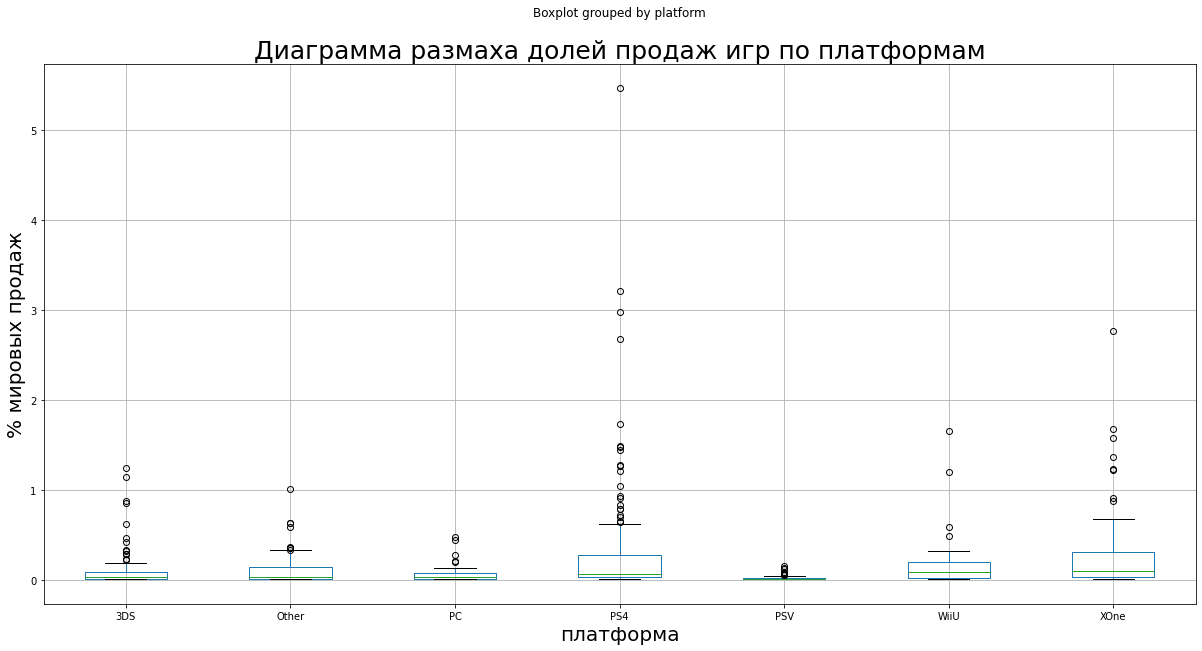

In [448]:
# строим график и выводим описательную статистику
plt.rcParams["figure.figsize"] = [20, 10]
ax = games_sales.boxplot(['total_sales_share'], by='platform')
ax.set_ylabel('% мировых продаж', size=20)
ax.set_xlabel('платформа', size=20)
ax.set_title('Диаграмма размаха долей продаж игр по платформам', size=25)
games_sales_pivot.describe()

(0.0, 0.04)

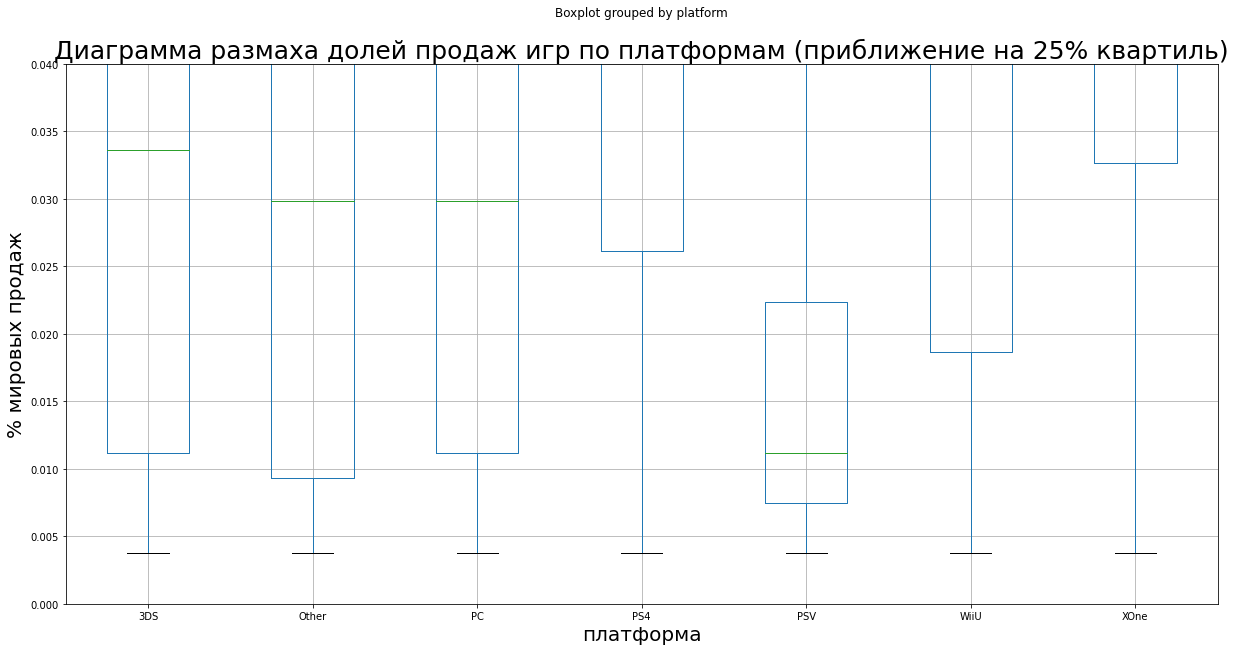

In [449]:
ax = games_sales.boxplot(['total_sales_share'], by='platform')
ax.set_ylabel('% мировых продаж', size=20)
ax.set_xlabel('платформа', size=20)
ax.set_title('Диаграмма размаха долей продаж игр по платформам (приближение на 25% квартиль)', size=25)
ax.set_ylim([0, 0.04]) 

Определили:
- совместная диаграмма размаха актуальных платформ показывает большие различия между нормальными продажами игр на них (межквартильный интервал);
- шансы получить экстремально высокие продажи (выбросы вверх) гораздо выше у игр на платформах PS4 и XOne;
- наиболее высокая стандартная доля (медиана) в мировой продажах - у игр на платформах XOne, WiiU и PS4;
- совместная диаграмма размаха с приближением на нижний край межквартильного интервала показывает нижние границы стандартный продаж по платформам, где в худшую сторону выделяются платформы 3DS и PC.


## Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Выберем платформу для анализа на основе доли продаж. Из актуальных платформ безусловный лидер - `PS4`. </br>
Для игр, представленных на этой платформе, и отзывов:
- построим диаграмму рассеяния и
- посчитаем корреляцию между отзывами и продажами.

In [450]:
# создаем срез по платформе PS4
games_ps4 = games_4.query('platform == "PS4"')
games_ps4.shape

(392, 12)

In [451]:
# удаляем пропуски отдельно в отзывах пользователей,
# отдельно - в отзывах критиков,
# т.к. на этапе предобработки выяснили, что
# количество пропусков по этим параметрам разное.
games_ps4_critic = \
games_ps4[['total_sales', 'critic_score']].\
dropna(subset=['critic_score']).reset_index(drop=True)
display('Critics table size:', games_ps4_critic.shape)
games_ps4_user = \
games_ps4[['total_sales', 'user_score']].\
dropna(subset=['user_score']).reset_index(drop=True)
display('Users table size:', games_ps4_user.shape)

'Critics table size:'

(252, 2)

'Users table size:'

(257, 2)

'Correlation between `total_sales` and `critic_score`:'

0.41

'Correlation between `total_sales` and `user_score`:'

-0.03

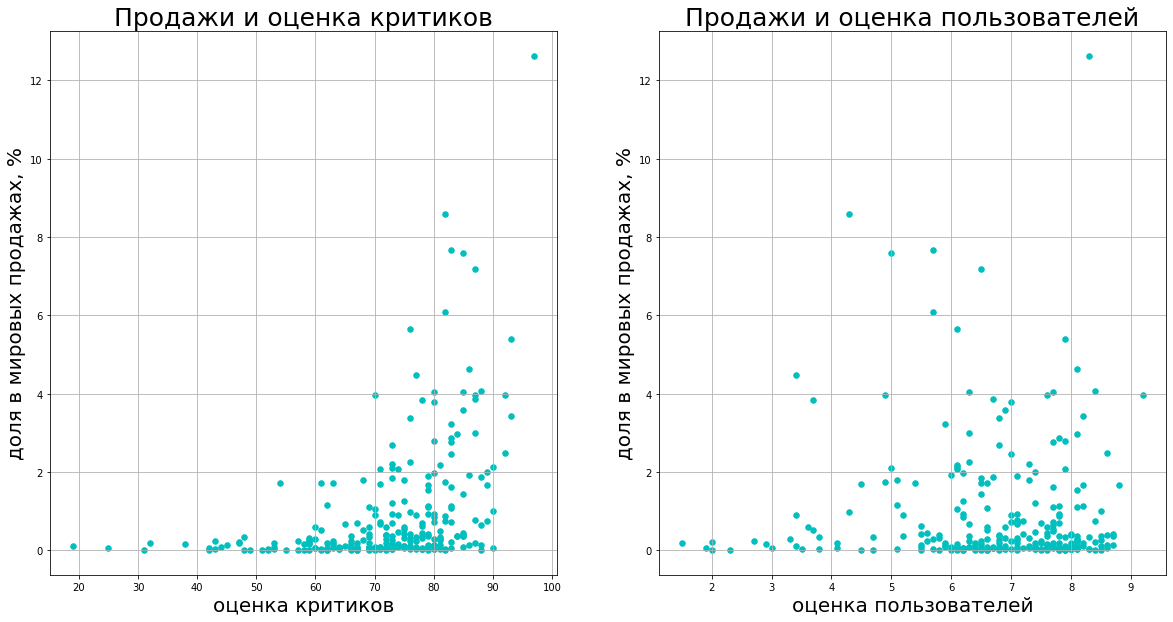

<Figure size 1440x720 with 0 Axes>

In [452]:
y1 = games_ps4_critic['total_sales']
x1 = games_ps4_critic['critic_score']
y2 = games_ps4_user['total_sales']
x2 = games_ps4_user['user_score']
plt.figure()   # plots figure for each iteration
plt.subplot(1, 2, 1)
plt.scatter(x1, y1, s=30, c='c')
plt.title('Продажи и оценка критиков', fontsize=25)
plt.grid()
plt.ylabel('доля в мировых продажах, %', size=20)
plt.xlabel('оценка критиков', size=20)
plt.subplot(1, 2, 2)
plt.scatter(x2, y2, s=30, c='c')
plt.title('Продажи и оценка пользователей', fontsize=25)
plt.grid()
plt.ylabel('доля в мировых продажах, %', size=20)
plt.xlabel('оценка пользователей', size=20)
plt.figure()

display('Correlation between `total_sales` and `critic_score`:', \
        round(x1.corr(y1),2))
display('Correlation between `total_sales` and `user_score`:', \
        round(x2.corr(y2),2))

Результаты:
- диаграммы рассеяния показывают большое количество игр с продажами, близкими к нулю, которые имеют оценки критиков и пользователей в широком диапазоне;
- на диаграмме с оценками критиков просматривается положительная зависимость продаж от оценки, на диаграмме с оценками пользователей зависимость не просматривается;
- линейная зависимость продаж от оценки критиков положительная слабая, от оценки пользователей зависимость отсутствует.

## Соотнесем полученные выводы с продажами игр на других потенциально перспективных платформах

In [453]:
# переименовываем непреспективные платформы в Other
games_5 = games_4
display(games_5.head())
def platform_other(pl):
    if pl in platform_sales_2015_perspective_short['name'].unique():
        return pl
    else:
        return 'Other'
games_5['platform'] = games_5['platform'].apply(platform_other)
display(games_5.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Other,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Mario Kart Wii,Other,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
4,Wii Sports Resort,Other,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros.,Other,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
9,Wii Play,Other,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


'For PS4 correlation between `total_sales` and `critic_score`:'

0.41

'For PS4 correlation between `total_sales` and `user_score`:'

-0.03

'For XOne correlation between `total_sales` and `critic_score`:'

0.42

'For XOne correlation between `total_sales` and `user_score`:'

-0.07

'For 3DS correlation between `total_sales` and `critic_score`:'

0.35

'For 3DS correlation between `total_sales` and `user_score`:'

0.22

'For WiiU correlation between `total_sales` and `critic_score`:'

0.35

'For WiiU correlation between `total_sales` and `user_score`:'

0.4

'For PC correlation between `total_sales` and `critic_score`:'

0.29

'For PC correlation between `total_sales` and `user_score`:'

-0.02

'For PSV correlation between `total_sales` and `critic_score`:'

0.13

'For PSV correlation between `total_sales` and `user_score`:'

0.01

'For Other correlation between `total_sales` and `critic_score`:'

0.25

'For Other correlation between `total_sales` and `user_score`:'

0.09

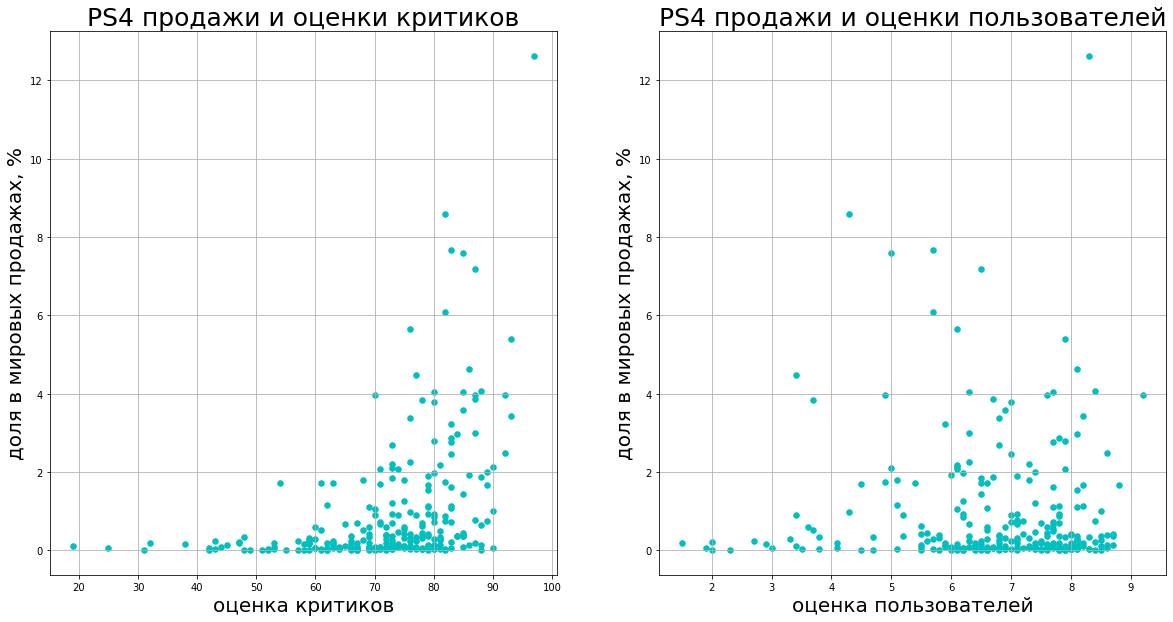

<Figure size 1440x720 with 0 Axes>

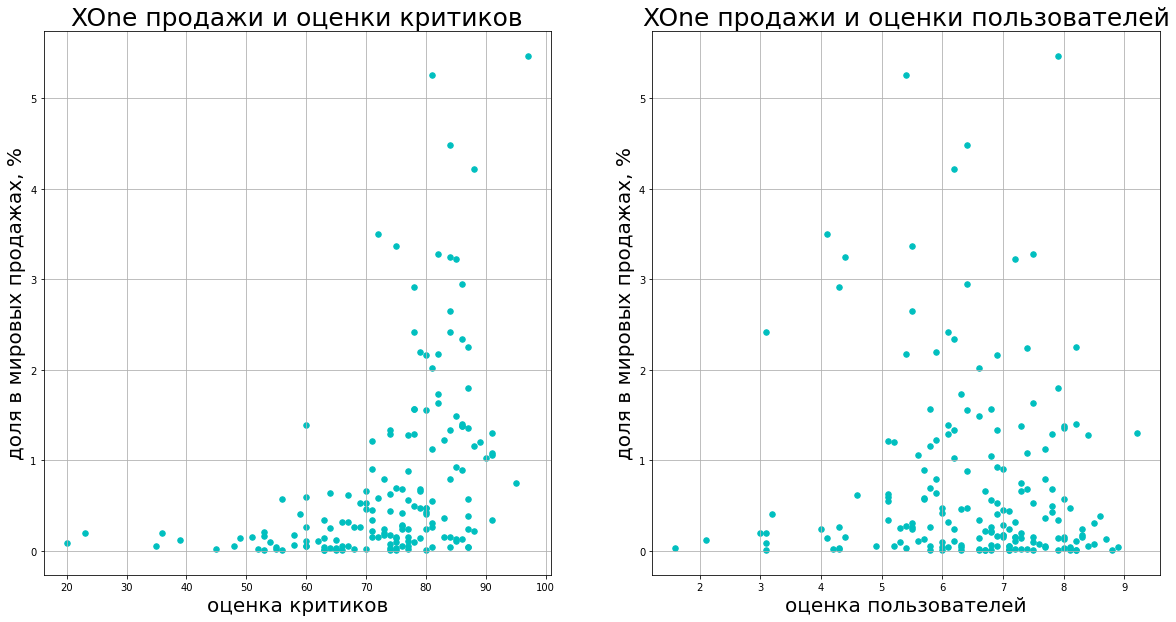

<Figure size 1440x720 with 0 Axes>

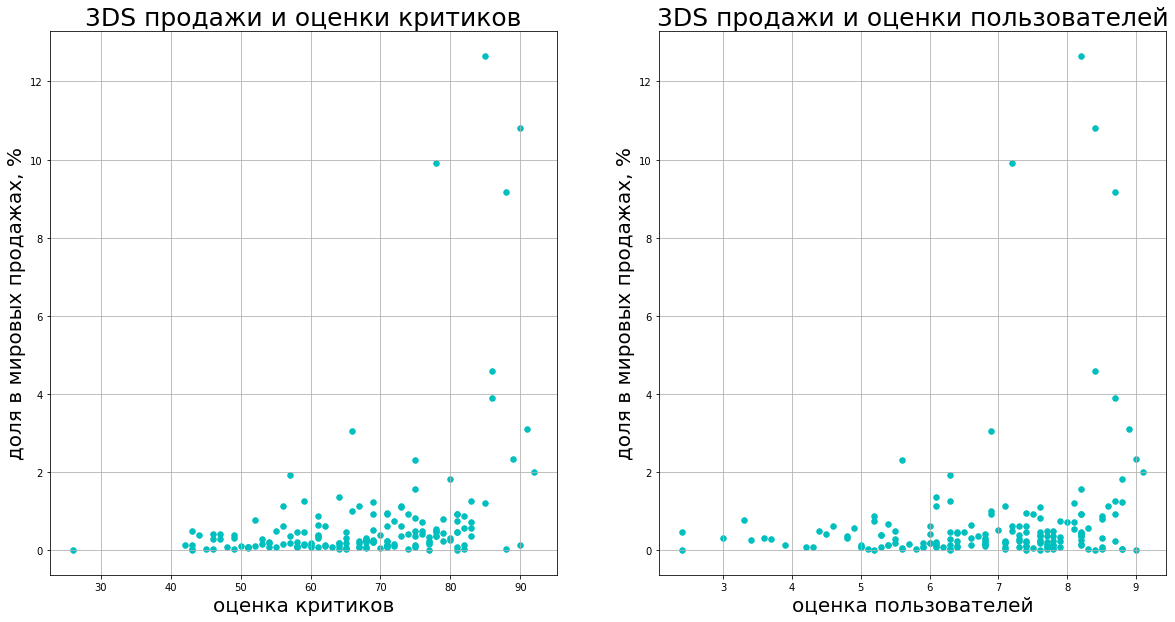

<Figure size 1440x720 with 0 Axes>

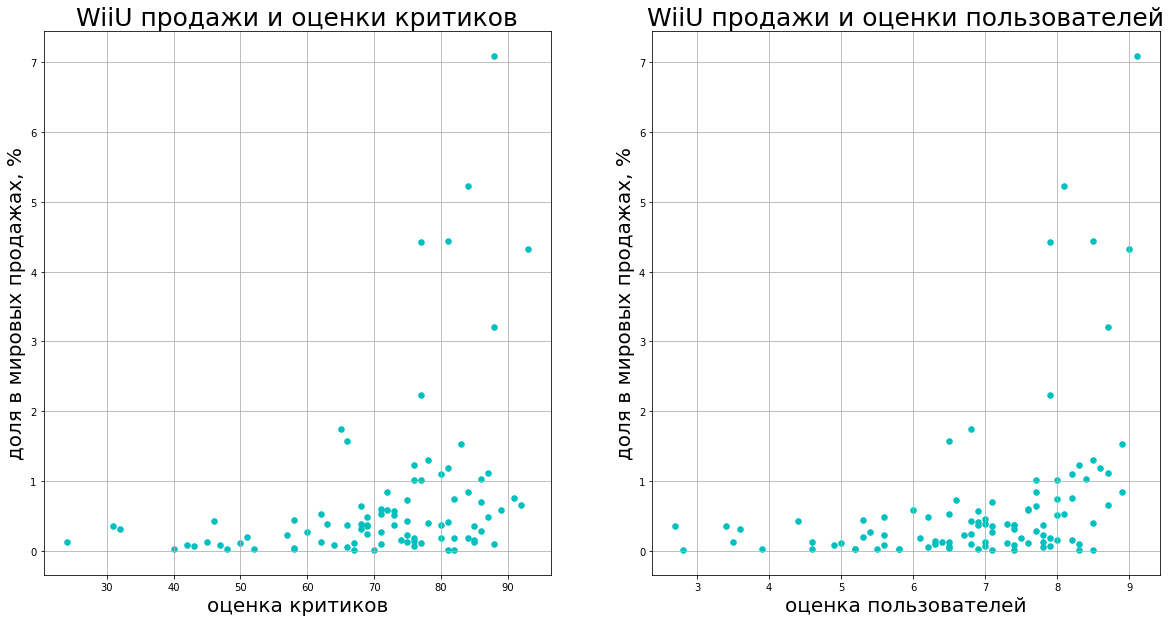

<Figure size 1440x720 with 0 Axes>

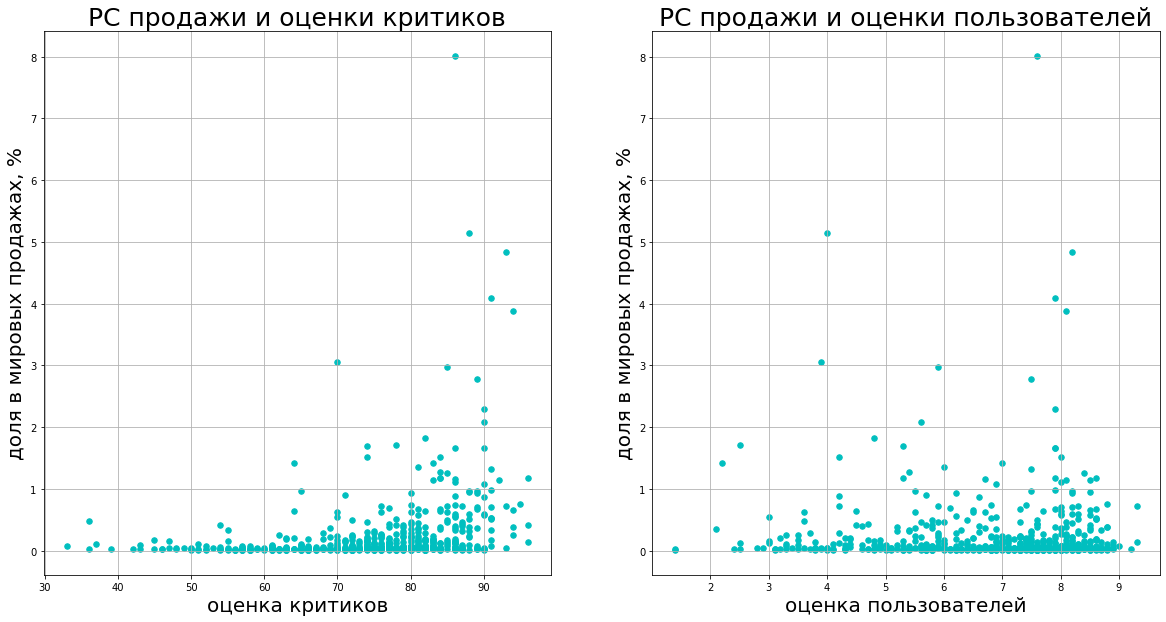

<Figure size 1440x720 with 0 Axes>

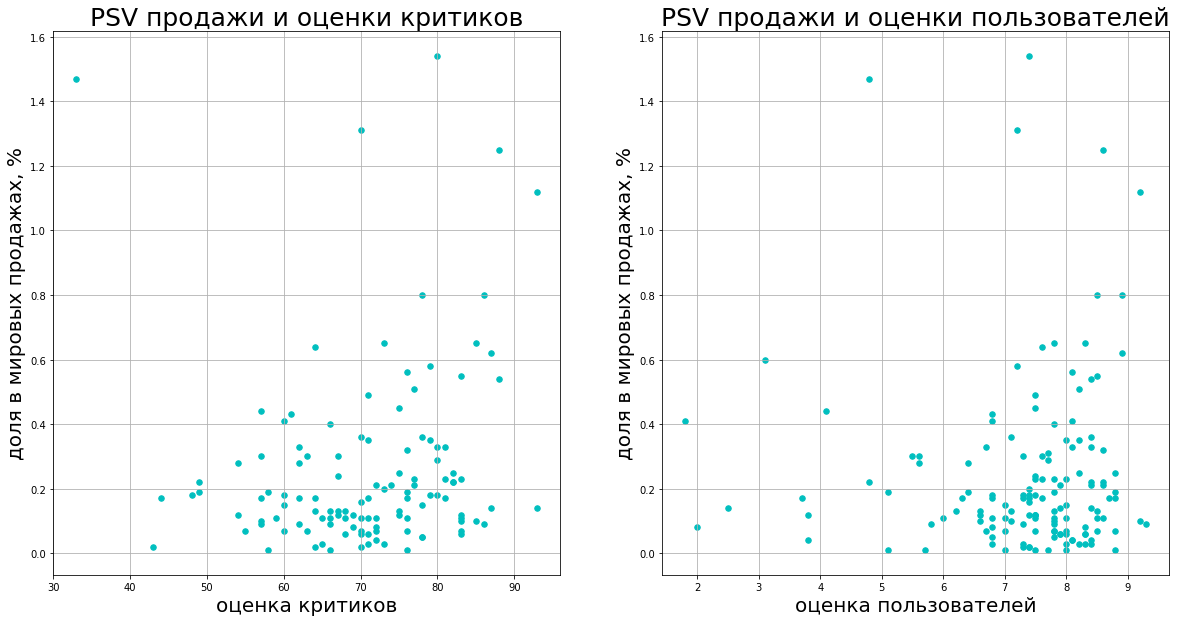

<Figure size 1440x720 with 0 Axes>

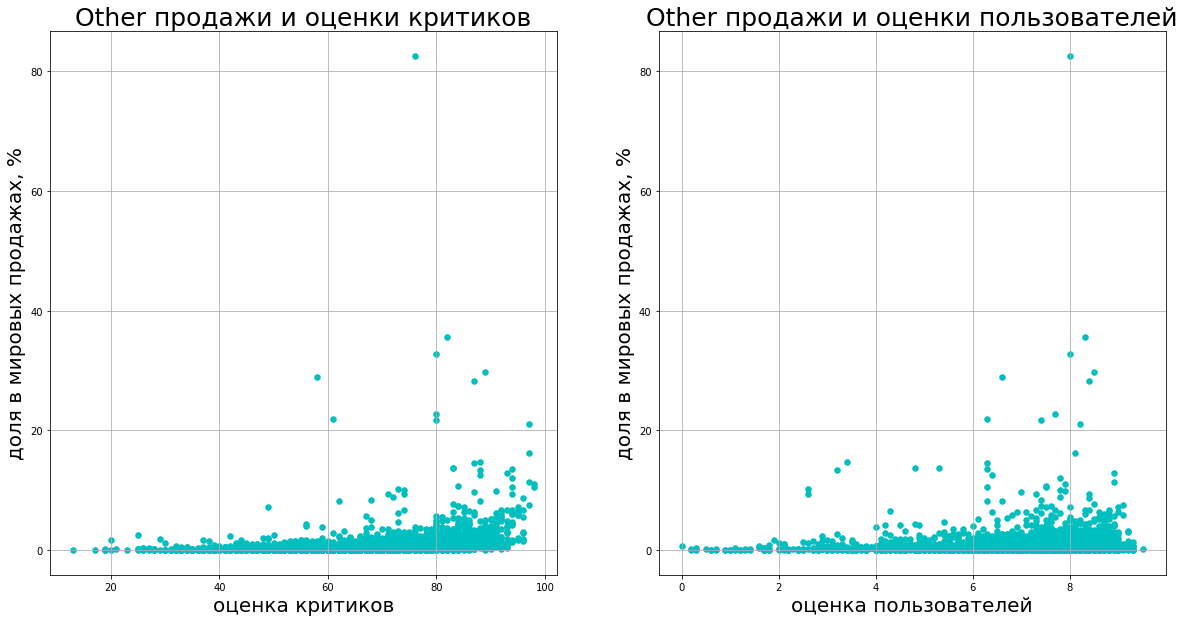

<Figure size 1440x720 with 0 Axes>

In [454]:
# повторяем построение диаграмм рассеяния и расчет корреляций для всех потенциально перспективных платформ
for i in platform_sales_2015_perspective_short['name']:
  y1 = games_5.loc[games_5['platform'] == f'{i}', \
   ['total_sales', 'critic_score']].dropna(subset=['critic_score']).\
   reset_index(drop=True)['total_sales']
  x1 = games_5.loc[games_5['platform'] == f'{i}', \
   ['total_sales', 'critic_score']].dropna(subset=['critic_score']).\
   reset_index(drop=True)['critic_score']
  y2 = games_5.loc[games_5['platform'] == f'{i}', \
   ['total_sales', 'user_score']].dropna(subset=['user_score']).\
   reset_index(drop=True)['total_sales']
  x2 = games_5.loc[games_5['platform'] == f'{i}', \
   ['total_sales', 'user_score']].dropna(subset=['user_score']).\
   reset_index(drop=True)['user_score']
  plt.figure()   # plots figure for each iteration
  plt.subplot(1, 2, 1)
  plt.scatter(x1, y1, s=30, c='c')
  plt.title(f'{i} продажи и оценки критиков', fontsize=25)
  plt.grid()
  plt.ylabel('доля в мировых продажах, %', size=20)
  plt.xlabel('оценка критиков', size=20)
  plt.subplot(1, 2, 2)
  plt.scatter(x2, y2, s=30, c='c')
  plt.title(f'{i} продажи и оценки пользователей', fontsize=25)
  plt.grid()
  plt.ylabel('доля в мировых продажах, %', size=20)
  plt.xlabel('оценка пользователей', size=20)
  plt.figure()
  display(f'For {i} correlation between `total_sales` and `critic_score`:',\
          round(x1.corr(y1),2))
  display(f'For {i} correlation between `total_sales` and `user_score`:',\
          round(x2.corr(y2),2))

Выводы, полученные на платформе `PS4`, подтвердились на других потенциально перспективных платформах. </br>
Наличие низкой положительной корреляции продаж с оценками пользователей на платформе `3DS`, чего нет на других платформах, по-видимому обусловлено общим низким уровнем оценок игр на данной платформе. Также нетипично низкая корреляция продаж с оценками критиков на платформе `PSV`

## Посмотрим на общее распределение продаж игр по жанрам.

In [455]:
# создадим новый срез games_sales_1 без переимнования платформ в Other
games_sales_1 = games_3.loc[games_3['year_of_release'] == 2015]
display(games_sales_1.info())
games_sales_1['total_sales_share'] = games_sales_1['total_sales'] / games_sales_1['total_sales'].sum() * 100
# проверка суммы долей
display(games_sales_1['total_sales_share'].sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 22 to 16399
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             606 non-null    object 
 1   platform         606 non-null    object 
 2   year_of_release  606 non-null    Int64  
 3   genre            606 non-null    object 
 4   na_sales         606 non-null    float64
 5   eu_sales         606 non-null    float64
 6   jp_sales         606 non-null    float64
 7   other_sales      606 non-null    float64
 8   critic_score     225 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           364 non-null    object 
 11  total_sales      606 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 62.1+ KB


None

100.0

In [456]:
# создадим сводную таблицу c долями по играм и платформам за 2015 год 
games_sales_pivot = \
games_sales_1.pivot_table(
    index='name', 
    columns='genre',
    values='total_sales_share', 
    # aggfunc='sum'
)

display(games_sales_pivot.head(10))

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
name,,,,,,,,,,,,
Fire Emblem Fates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.623181,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,0.063438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7 Roses: A Darkness Rises,NaN,NaN,NaN,0.007463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7th Dragon III Code: VFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059706,NaN,NaN,NaN,NaN
A Good Librarian Like a Good Shepherd: Library Party,0.011195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abunai: Koi no Sousa Shitsu,0.007463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Act of Aggression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003732
Adventure Time: Finn & Jake Investigations,0.028609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aikatsu! My No.1 Stage!,NaN,NaN,NaN,0.029853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,150.000000,35.000000,11.000000,29.000000,9.000000,5.000000,7.000000,57.000000,14.000000,12.000000,18.000000,15.000000
mean,0.094682,0.045737,0.104768,0.092840,0.238409,0.050377,0.233795,0.134993,0.743175,0.145922,0.203308,0.044406
std,0.229294,0.117262,0.151128,0.131413,0.389737,0.073196,0.275545,0.252212,0.694271,0.316125,0.319134,0.053875
min,0.003732,0.003732,0.007463,0.003732,0.011195,0.007463,0.018658,0.003732,0.022390,0.003732,0.011817,0.003732
25%,0.007463,0.007463,0.018658,0.011195,0.016170,0.011195,0.031221,0.018658,0.229028,0.013994,0.028174,0.007463
50%,0.020524,0.011195,0.041048,0.026121,0.093291,0.013061,0.120656,0.034828,0.413744,0.055974,0.057840,0.014926
75%,0.055974,0.022390,0.110083,0.156728,0.190313,0.041048,0.381558,0.108217,1.443205,0.119645,0.165124,0.080230
max,1.724009,0.619449,0.523671,0.589596,1.197851,0.179118,0.671692,1.575988,1.915815,1.138145,1.216509,0.194044


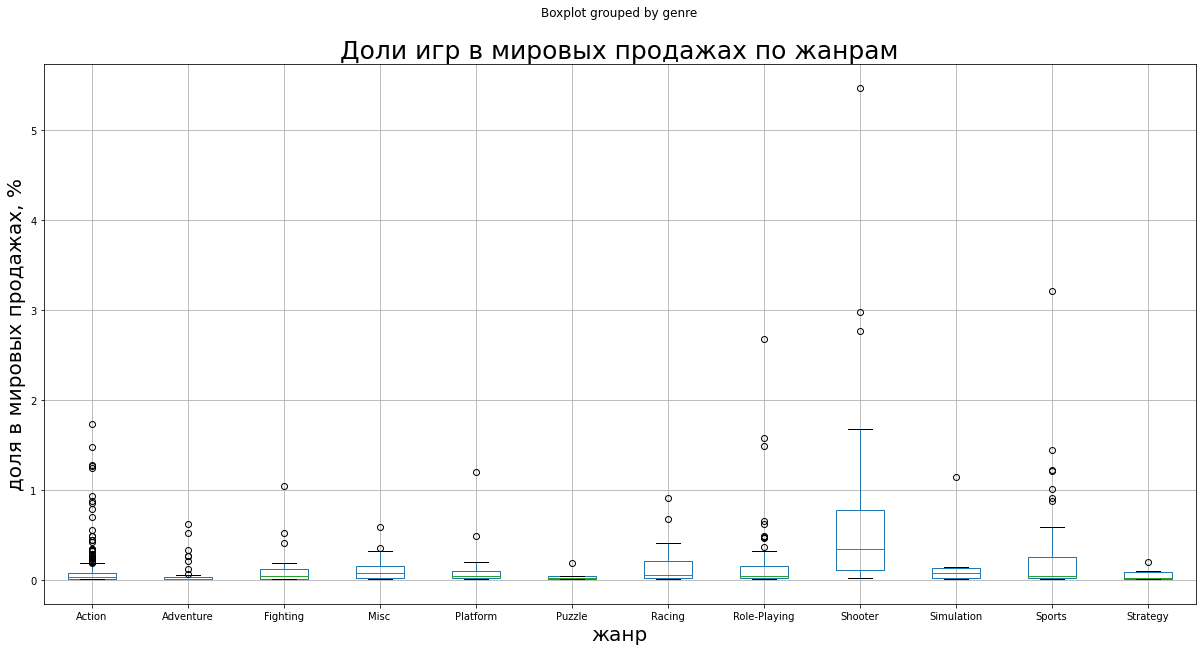

In [457]:
plt.rcParams["figure.figsize"] = [20, 10]
ax = games_sales_1.boxplot(['total_sales_share'], by='genre')
ax.set_ylabel('доля в мировых продажах, %', size=20)
ax.set_xlabel('жанр', size=20)
ax.set_title('Доли игр в мировых продажах по жанрам', size=25)
games_sales_pivot.describe()

(0.0, 0.12)

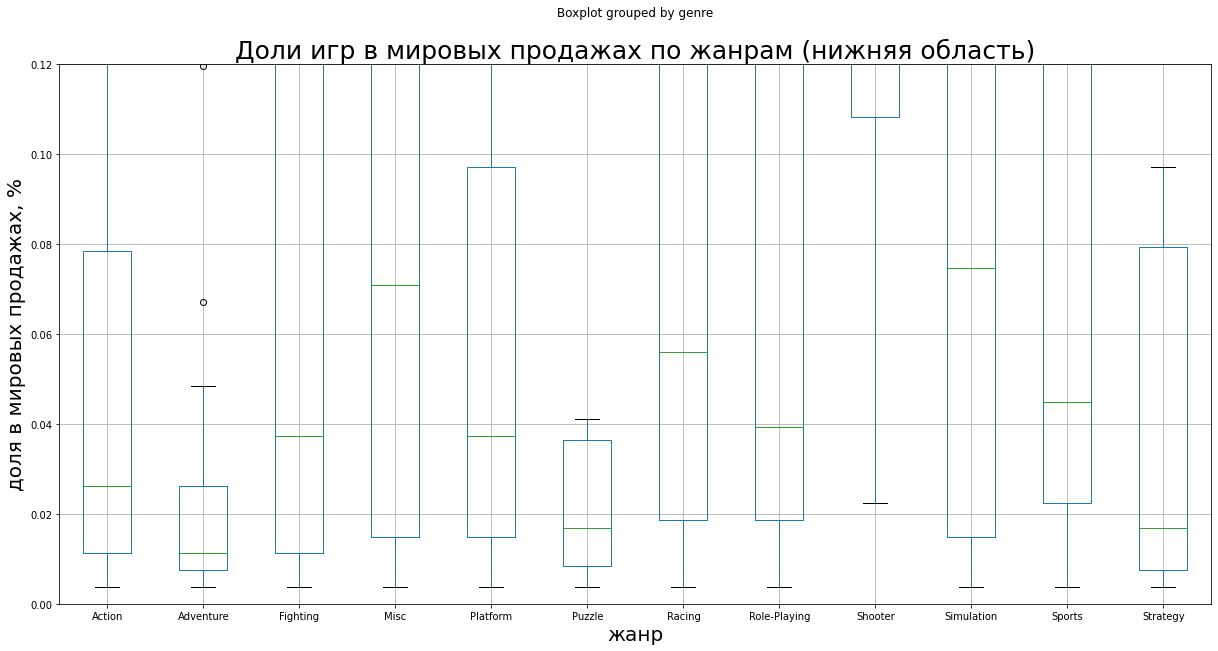

In [458]:
ax = games_sales_1.boxplot(['total_sales_share'], by='genre')
ax.set_ylabel('доля в мировых продажах, %', size=20)
ax.set_xlabel('жанр', size=20)
ax.set_title('Доли игр в мировых продажах по жанрам (нижняя область)', size=25)
ax.set_ylim([0, 0.12]) 

Жанры соотносятся с продажами в 2015 г. следующим образом:
- наиболее высокие типичные (медианные) продажи - в жанрах Shooter, Racing, Sports и Platform, а наиболее низкие у Adventure, Strategy, Action и Puzzle; 
- при этом в жанрах Shooter, Platform, Simulation и Sports продажи нестабильны (высокое стандартное отлонение), а в Puzzle и Strategy гораздо стабильнее;
- помимо прочего жанры Racing, Puzzle и Platform слабо наполнены играми, конкурентов мало;
- также обратим внимание, что в жанрах Action, Adventure, Puzzle и Strategy игры часто зарабаотывают меньше, чем в других жанрах, что подтверждается низкими 25% квартилями.


**Выводы по разделу 2:**
- С точки зрения объема продаж значимыми годами для анализа факторов успеха игр будем считать период с 1994 года.
- Крупнейшими по совокупным продажам можно назвать платформы с продажами от 686, таких 6 единиц: `PS2`, `X360`, `Wii`, `PS3`, `DS`, `PS`.
- Столбчатые диаграммы распределения продаж по годам для крупнейших платформ показывают:
  - крупнейшие платформы существовали в разные периоды времени;
  - характерный срок жизни платформ равен 10 годам.
- Поскольку с 2008 года объем продаж на рынке снижается, успешность актуальных платформ необходимо рассматривать в % от продаж за год, а не в абсолютных значениях.
- Представление продаж актуальных платформ в долях от рынка дает результаты касательно наиболее актуальных платформ:
 - наибольшая и растущая доля рынка у `PS4` (42% за 2015) и `XOne` (23% за 2015);
 - у `PC` в 2015 предположительно завершился очередной 10-летний цикл и в 2016 вероятно начался следующей цикл, т.к. даже с неполными данными за 2016 год доля продаж выросла с 3,3% до 4,2%;
 - у остальных платформ нет выраженной тенденции к росту, при этом пройдена половина жизненного цикла.
- Совместная диаграмма размаха актуальных платформ показывает большие различия между нормальными продажами игр на них (межквартильный интервал);
 - шансы получить экстремально высокие продажи (выбросы вверх) гораздо выше у игр на платформах PS4 и XOne;
 - наиболее высокая стандартная доля (медиана) в мировой продажах - у игр на платформах XOne, WiiU и PS4;
 - совместная диаграмма размаха с приближением на нижний край межквартильного интервала показывает нижние границы стандартных продаж по платформам, где в худшую сторону выделяются платформы 3DS и PC.
- Отзывы пользователей и критиков и продажи игр изучили с помощью диаграмм рассеяния и корреляций и выяснили:
 - на диаграммах просматривается положительная зависимость продаж от оценки критиков, зависимость от оценками пользователей не просматривается;
 - линейная зависимость продаж от оценки критиков положительная слабая, от оценки пользователей зависимость отсутствует.
- Жанры соотносятся с продажами в 2015 г. следующим образом:
 - наиболее высокие типичные (медианные) продажи - в жанрах Shooter, Racing, Sports и Platform, а наиболее низкие у Adventure, Strategy, Action и Puzzle; 
- при этом в жанрах Shooter, Platform, Simulation и Sports продажи нестабильны (высокое стандартное отлонение), а в Puzzle и Strategy гораздо стабильнее;
- помимо прочего жанры Racing, Puzzle и Platform слабо наполнены играми, конкурентов мало;
- также обратим внимание, что в жанрах Action, Adventure, Puzzle и Strategy игры часто зарабаотывают меньше, чем в других жанрах, что подтверждается низкими 25% квартилями.

# **3. Исследовательский анализ данных по пользователям и регионам**

## Определим для пользователя каждого региона самые популярные платформы (топ-5). Опишем различия в долях продаж.
  

In [459]:
# создаем срез для анализа долей, содержащий данныеза 2015
games_2015 = games_3.loc[games_2['year_of_release'] == 2015]
games_2015.shape

(606, 12)

In [460]:
# выведем продажи по регионам за 2015 гг.
display('NA sales amount and pct:', games_2015['na_sales'].\
        sum(), round(games_2015['na_sales'].sum()\
                     / games_2015['total_sales'].sum(),2))
display('EU sales amount and pct:', games_2015['eu_sales'].\
        sum(), round(games_2015['eu_sales'].sum()\
                     / games_2015['total_sales'].sum(),2))
display('JP sales amount and pct:', games_2015['jp_sales'].\
        sum(), round(games_2015['jp_sales'].sum()\
                     / games_2015['total_sales'].sum(),2))

'NA sales amount and pct:'

106.85999999999999

0.4

'EU sales amount and pct:'

96.72

0.36

'JP sales amount and pct:'

34.09

0.13

In [461]:
# рассчитаем и визуализируем доли в продажах
# каждой платформы по регионам
games_regions = games_2015.groupby('platform').sum()
games_regions['na_share'] = \
round(games_regions['na_sales'] / \
      games_regions['na_sales'].sum(), 4)
games_regions['eu_share'] = \
round(games_regions['eu_sales'] / \
      games_regions['eu_sales'].sum(), 4)
games_regions['jp_share'] = \
round(games_regions['jp_sales'] / \
      games_regions['jp_sales'].sum(), 4)

In [462]:
display(games_regions.head(10))

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,na_share,eu_share,jp_share
platform,,,,,,,,,,,
3DS,173290,6.17,5.06,15.52,1.03,1351.0,159.2,27.78,0.0577,0.0523,0.4553
PC,100750,2.36,5.57,0.00,0.59,2543.0,245.5,8.52,0.0221,0.0576,0.0000
PS3,147095,4.99,6.04,3.67,2.12,63.0,154.6,16.82,0.0467,0.0624,0.1077
PS4,276055,42.37,51.76,6.31,18.46,6276.0,607.6,118.90,0.3965,0.5352,0.1851
PSP,6045,0.00,0.00,0.12,0.00,0.0,0.0,0.12,0.0000,0.0000,0.0035
PSV,221650,0.39,0.69,4.85,0.32,1003.0,180.0,6.25,0.0036,0.0071,0.1423
Wii,8060,0.43,0.62,0.00,0.09,0.0,0.0,1.14,0.0040,0.0064,0.0000
WiiU,56420,6.76,5.01,3.45,1.13,1346.0,138.9,16.35,0.0633,0.0518,0.1012
X360,70525,7.36,3.50,0.00,1.10,0.0,137.9,11.96,0.0689,0.0362,0.0000


In [463]:
display(games_regions.sort_values('na_share', ascending=False).index)
leg = games_regions.sort_values('na_share', ascending=False).index

Index(['PS4', 'XOne', 'X360', 'WiiU', '3DS', 'PS3', 'PC', 'Wii', 'PSV', 'PSP'], dtype='object', name='platform')

In [464]:
# переименовываем малые платформ в Other, группируем и сортируем
games_regions_na = games_regions.reset_index(drop=False)
def top_5 (x1, x2):
    if x1 < 0.05:
        return 'Other'
    else:
        return x2
    
games_regions_na['platform'] = \
games_regions_na.apply(
    lambda x: top_5(
        x['na_share'], 
        x['platform']), 
    axis=1)
games_regions_na = games_regions_na.\
groupby('platform', sort=False).sum()\
.reindex(['PS4', 'XOne', 'X360', 'WiiU', '3DS', 'Other'])
display(games_regions_na.head(10))

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,na_share,eu_share,jp_share
platform,,,,,,,,,,,
PS4,276055,42.37,51.76,6.31,18.46,6276.0,607.6,118.90,0.3965,0.5352,0.1851
XOne,161200,36.03,18.47,0.17,5.47,3814.0,356.1,60.14,0.3372,0.1910,0.0050
X360,70525,7.36,3.50,0.00,1.10,0.0,137.9,11.96,0.0689,0.0362,0.0000
WiiU,56420,6.76,5.01,3.45,1.13,1346.0,138.9,16.35,0.0633,0.0518,0.1012
3DS,173290,6.17,5.06,15.52,1.03,1351.0,159.2,27.78,0.0577,0.0523,0.4553
Other,483600,8.17,12.92,8.64,3.12,3609.0,580.1,32.85,0.0764,0.1335,0.2535


In [465]:
# переименовываем малые платформ в Other, группируем и сортируем
games_regions_eu = games_regions.reset_index(drop=False)
def top_5 (x1, x2):
    if x1 < 0.0522:
        return 'Other'
    else:
        return x2
games_regions_eu['platform'] = \
games_regions_eu.apply(
    lambda x: top_5(
        x['eu_share'], 
        x['platform']), 
    axis=1)
games_regions_eu = games_regions_eu.\
groupby('platform', sort=False).sum()\
.reindex(['PS4', 'XOne', 'PS3', 'PC', '3DS', 'Other'])

In [466]:
# переименовываем малые платформ в Other, группируем и сортируем
games_regions_jp = games_regions.reset_index(drop=False)
def top_5 (x1, x2):
    if x1 < 0.10:
        return 'Other'
    else:
        return x2
games_regions_jp['platform'] = \
games_regions_jp.apply(
    lambda x: top_5(
        x['jp_share'],
        x['platform']), 
    axis=1)
games_regions_jp = games_regions_jp.\
groupby('platform', sort=False).sum()\
.reindex(['3DS', 'PS4', 'PSV', 'PS3', 'WiiU', 'Other'])
display(games_regions_jp.head(10))

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,na_share,eu_share,jp_share
platform,,,,,,,,,,,
3DS,173290,6.17,5.06,15.52,1.03,1351.0,159.2,27.78,0.0577,0.0523,0.4553
PS4,276055,42.37,51.76,6.31,18.46,6276.0,607.6,118.90,0.3965,0.5352,0.1851
PSV,221650,0.39,0.69,4.85,0.32,1003.0,180.0,6.25,0.0036,0.0071,0.1423
PS3,147095,4.99,6.04,3.67,2.12,63.0,154.6,16.82,0.0467,0.0624,0.1077
WiiU,56420,6.76,5.01,3.45,1.13,1346.0,138.9,16.35,0.0633,0.0518,0.1012
Other,346580,46.18,28.16,0.29,7.25,6357.0,739.5,81.88,0.4322,0.2912,0.0085


Text(0.5, 1.0, 'Продажи по платформам в Японии')

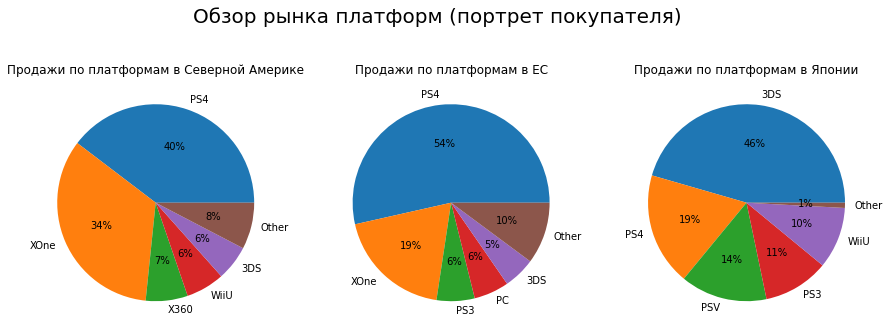

In [467]:
# построим графики
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=20)
ax2 = plt.subplot(2, 3, 1)
leg1 = games_regions_na.index
plt.pie(games_regions_na['na_share'], autopct='%1.0f%%', labels=leg1)
ax2.set_title('Продажи по платформам в Северной Америке', size=12)
ax3 = plt.subplot(2, 3, 2)
leg2 = games_regions_eu.index
plt.pie(games_regions_eu['eu_share'], autopct='%1.0f%%', labels=leg2)
ax3.set_title('Продажи по платформам в ЕС', size=12)
ax4 = plt.subplot(2, 3, 3)
leg3 = games_regions_jp.index
plt.pie(games_regions_jp['jp_share'], autopct='%1.0f%%', labels=leg3)
ax4.set_title('Продажи по платформам в Японии', size=12)

In [468]:
# переименовываем малые платформ в Other
games_regions_eu = games_regions.reset_index(drop=False)
def top_5 (x1, x2):
    if x1 < 0.051:
        return 'Other'
    else:
        return x2
games_regions_eu['platform'] = games_regions_eu.apply(lambda x: top_5(x['eu_share'], x['platform']), axis=1)

Для каждого региона вывели круговые диаграммы долей платформ в продажах. </br>
- в Северной Америке Топ-5 занимают 93% рынка и в них входят: PS4, XOne, X360, 3DS, WiiU;
- в EC Топ-5 занимают 84% рынка и в них входят: PS4, XOne, PS3, 3DS, PC;
- в Японии Топ-5 занимают 100% рынка и в них входят: 3DS, PS4, PSV, PS3, WiiU.
- во всех регионах в Топ 5 входят платформы PS4 и 3DS.

## Определим для каждого региона самые популярные жанры (топ-5). Поясним разницу.

In [469]:
# рассчитаем и визуализируем доли в продажах
# каждого жанра по регионам
games_regions = games_2015.\
groupby('genre').sum()
games_regions['na_share'] = \
round(games_regions['na_sales'] / \
      games_regions['na_sales'].sum(), 2)
games_regions['eu_share'] = \
round(games_regions['eu_sales'] / \
      games_regions['eu_sales'].sum(), 2)
games_regions['jp_share'] = \
round(games_regions['jp_sales'] / \
      games_regions['jp_sales'].sum(), 2)

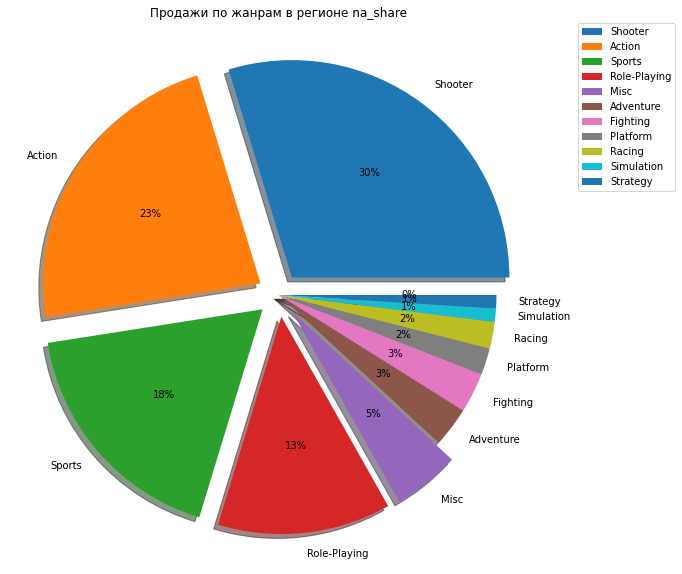

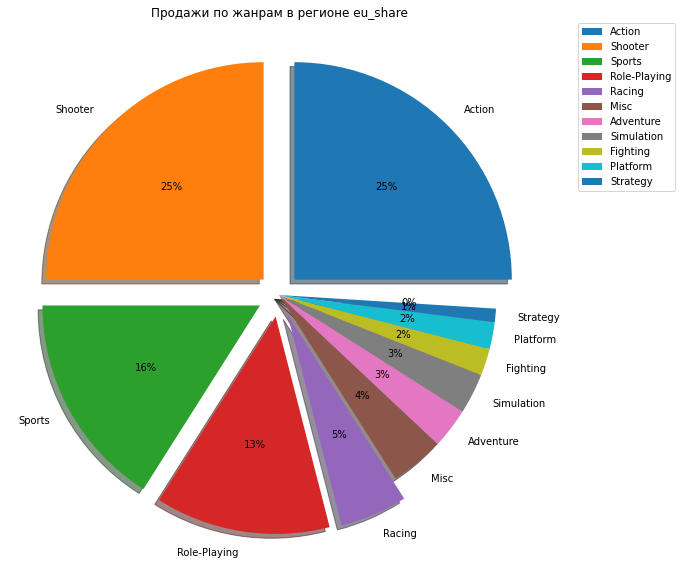

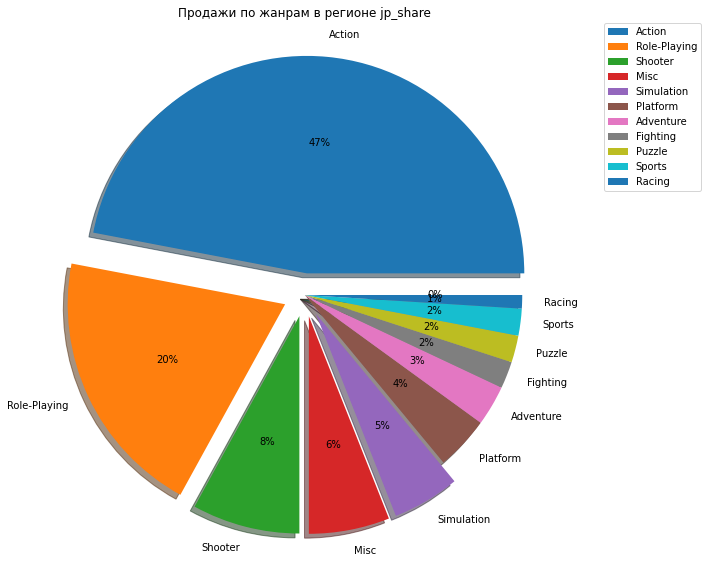

In [470]:
# построим графики
for name in ('na_share', 'eu_share', 'jp_share'):
  # display(games_regions.head())
  expl = []
  for i in range(5):
    expl.append(0.1)
  for i in range(5, len(games_regions[f'{name}'])):
    expl.append(0)
  # display(len(games_regions[f'{name}']), expl)
  games_regions.sort_values(f'{name}', ascending=False).\
  plot(y=f'{name}', kind='pie', autopct = '%1.0f%%', \
       explode=expl, shadow=True, title=\
       f'Продажи по жанрам в регионе {name}', ylabel='')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=\
             'upper left', borderaxespad=0)

Для каждого региона вывели круговые диаграммы долей жанров в продажах. </br>
- в Северной Америке Топ-5 занимают 88% рынка и в них входят: Shooter, Action, Sports, Role Playing, Misc;
- в EC Топ-5 занимают 85% рынка и в них входят: Action, Shooter, Sports, Role Playing, Racing;
- в Японии Топ-5 занимают 86% рынка и в них входят: Action, Role Playing, Shooter, Misc, Simulation.
- во всех регионах в Топ 5 входят жанры Shooter, Action и Role Playing.

## Выясним для каждого региона, влияет ли рейтинг ESRB на продажи.

Для этого:
- изучим объемы продаж игр с различными рейтингами ESRB;
- рассчитаем средние продажи игр для каждого рейтинга;
- простроим диаграмму рассеяния продаж игр по рейтингам.

In [472]:
# чтобы узнать, влияет ли ESRB рейтинг
# на продажи в регионе,
# построим столбчатые диаграммы с долями
# продаж, приходящимися на каждый рейтинг
# рассчитаем и визуализируем доли в продажах
# каждого жанра по регионам
# сначала просуммируем данные по рейтингу
games_regions = games_2015.groupby('rating').sum()
# display(games_regions.head(10))
# рассчитаем доли продаж в отдельных столбцах
games_regions['na_share'] = \
round(games_regions['na_sales'] / \
      games_regions['na_sales'].sum() * 100, 0)
games_regions['eu_share'] = \
round(games_regions['eu_sales'] / \
      games_regions['eu_sales'].sum() * 100, 0)
games_regions['jp_share'] = \
round(games_regions['jp_sales'] / \
      games_regions['jp_sales'].sum() * 100, 0)
display(games_regions.head(10))
# сортируем строки по возрастанию возрастной
# категории рейтинга ESRB
games_regions = games_regions.\
loc[['E', 'E10+', 'T', 'M']]

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,na_share,eu_share,jp_share
rating,,,,,,,,,,,
E,189410,18.69,21.36,4.19,5.50,3380.0,422.5,49.74,23.0,29.0,25.0
E10+,114855,14.51,8.54,2.85,3.10,2535.0,292.0,29.00,18.0,12.0,17.0
M,187395,33.77,31.78,3.41,10.22,4869.0,507.7,79.18,41.0,44.0,21.0
T,241800,14.72,11.32,5.99,3.99,5230.0,704.4,36.02,18.0,16.0,36.0


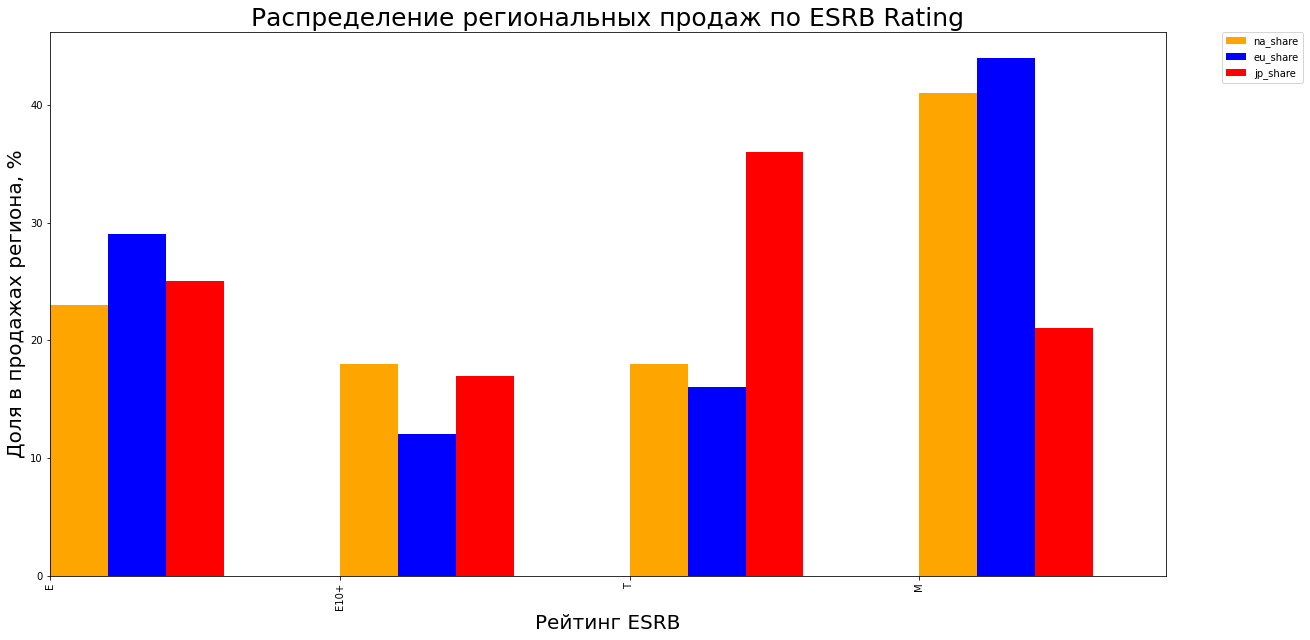

In [473]:
# построим график для трех регионов
col = ['orange', 'b', 'r']
pos = [0, -1, -2]
count = 0
for name in ('na_share', 'eu_share', 'jp_share'):
  ax = games_regions[f'{name}'].\
  plot(x=['E', 'E10+', 'T', 'M'], \
       kind='bar', color=col[count], \
       position=pos[count], width=0.2, \
       title='Распределение региональных продаж по рейтингам ESRB', \
       )
  plt.legend(bbox_to_anchor=(1.05, 1), \
             loc='upper left', borderaxespad=0)
  ax.set_ylabel('Доля в продажах региона, %', size=20)
  ax.set_xlabel('Рейтинг ESRB', size=20)
  ax.set_title('Распределение региональных продаж по ESRB Rating', size=25)
  count +=1

In [90]:
# удаляем строки с отсутствующими рейтингами
# ESRB из среза
display(games_2015.shape)       
        
games_2015 = games_2015.dropna(subset=['rating'])
display(games_2015.shape)

(606, 12)

(364, 12)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
rating,,,,,,,,
E,2015.0,0.198830,0.227234,0.044574,0.058511,68.979592,5.868056,0.529149
E10+,2015.0,0.254561,0.149825,0.050000,0.054386,72.428571,6.636364,0.508772
T,2015.0,0.122667,0.094333,0.049917,0.033250,72.638889,6.974257,0.300167
M,2015.0,0.363118,0.341720,0.036667,0.109892,77.285714,6.954795,0.851398


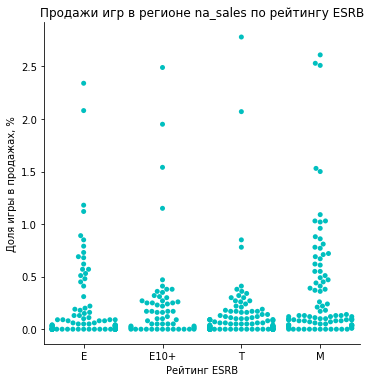

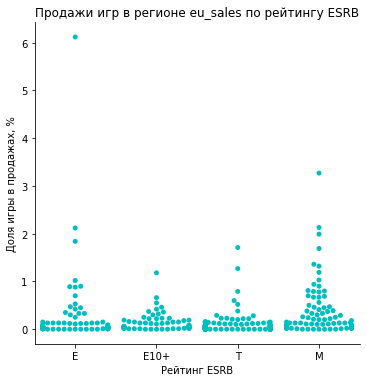

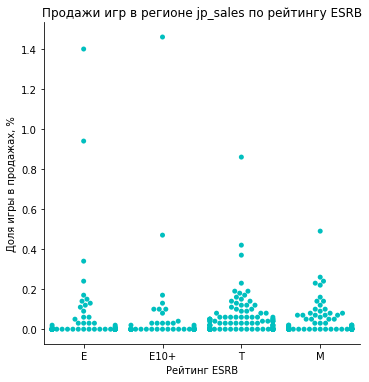

In [493]:
# рассчитаем средние продажи игр по рейтингам,
# для одного региона
display(games_2015.groupby('rating').\
        mean().loc[['E', 'E10+', 'T', 'M']])
# построим диаграмму рессеяния для
# категориальных переменных
for i in ['na_sales', 'eu_sales', 'jp_sales']:
  sns.catplot(data=games_2015, x='rating', \
              y=f'{i}', kind='swarm', \
              order=['E', 'E10+', 'T', 'M'], \
              color='c').\
              set(title=f'Продажи игр в регионе {i} по рейтингу ESRB',\
                  xlabel='Рейтинг ESRB',\
                  ylabel='Доля игры в продажах, %')

**Выводы по Разделу 3** </br>
На основе анализа данных за 2015 год (последний год, по котором есть полные сведения), определили:
- Для каждого региона вывели круговые диаграммы долей платформ в продажах. </br>
 - в Северной Америке Топ-5 занимают 93% рынка и в них входят: PS4, XOne, X360, 3DS, WiiU;
 - в EC Топ-5 занимают 89% рынка и в них входят: PS4, XOne, PS3, 3DS, PC;
 - в Японии Топ-5 занимают 100% рынка и в них входят: 3DS, PS4, PSV, PS3, WiiU.
 - во всех регионах в Топ 5 входят платформы PS4 и 3DS.
- Для каждого региона вывели круговые диаграммы долей жанров в продажах. </br>
 - в Северной Америке Топ-5 занимают 88% рынка и в них входят: Shooter, Action, Sports, Role Playing, Misc;
 - в EC Топ-5 занимают 85% рынка и в них входят: Action, Shooter, Sports, Role Playing, Racing;
 - в Японии Топ-5 занимают 86% рынка и в них входят: Action, Role Playing, Shooter, Misc, Simulation.
 - во всех регионах в Топ 5 входят жанры Shooter, Action и Role Playing.
- В регионах NA и EU наибольшие продажи в сегментах игр с предельными рейтингами `M` (Mature 17+, Взрослые 17+) и `E` (Everyone, Все возраста); в регионе JP преобладают сегменты с рейтингами `T`(Teen 13+, Подростки 13+) и `E`;
- Что касается успешности отдельных игр в зависимости от рейтинга ESRB, то:
 - на диаграмме рассеяния для категориальных переменных не прослеживается взаимосвязь объема продаж от повышения возрастной категории игр ни в одном из регионов;
 - в то же время средние продажи игр различаются в зависимости от возрастных категорий и регионов: в NA и EU наибольшие средние продажи в категории `M`, а наименьшие - в категории `T`. В регионе JP выраженных кратных различий в средних продажах между возрастными категориями нет.
- Таким образом, по пользовательской популярности можем выделить:
 - платформы PS4 и 3DS; жанры Shooter, Action и Role Playing; игры с рейтингами ERSB `M` в регионах NA, EU и `T` в регионе JP.


# **4. Проверим гипотезы по пользовательским рейтингам** </br>
(пороговое значение alpha зададаим самостоятельно, поясним: Как мы сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.) </br>

## Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

В **Разделах 2 и 3** мы уже обращались к этим платформам:
- выяснили, что в мировой рейтинге по продажам `XOne` (Xbox One) является №2 , а `PC` - №4;
- заключили, что эти платформы входят в число наиболее перспективных с учетом стадии "жизненного цикла";
- не обнаружили связи пользовательских рейтингов данных платформ с продажами.

Теперь мы сравним абсолютные значения рейтингов пользователей между данными платформами. </br>
На первом шаге сравним статистические характеристики рейтингов, сформулируем гипотезы и выберем статистическую значимость (значение alpha). </br>
На втором шаге проверим гипотезы.

In [494]:
# рассмотрим данные за период,
# в теченик которого платформы существовали 
# одновременно 2013-2016 гг.
# получим статистические характеристики срезов
display('XOne ratings:', games_4.\
        query(('platform == "XOne"'))\
         ['user_score'].dropna().describe())
display('XOne sample size:', games_4.\
        query('platform == "XOne"')\
         ['user_score'].dropna().shape[0])
display('PC ratings:', games_4.\
        loc[(games_4['year_of_release'] > 2012)\
            & (games_4['platform'] == "PC")]\
         ['user_score'].dropna().describe())
display('PC sample size:', games_4.\
        query('platform == "PC"')\
         ['user_score'].dropna().shape[0])

'XOne ratings:'

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

'XOne sample size:'

182

'PC ratings:'

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

'PC sample size:'

615

1. Центры распределений рейтингов платформ: средняя у платформы `XOne` несколько выше, при этом медианы совпадают (6.52 vs 6.27; 6.8 vs 6.8).
2. ***Нулевая гипотеза***: средние рейтинги равны у платформ. ***Альтернативная гипотеза*** (односторонняя): средние рейтинги не равны у платформ.
3. Для применения t-теста, нужно проверить три условия:
- генеральные совокупности не зависят друг от друга - ДА (нет причин считать, что они зависимы);
- выборочные средние нормально распределены - ДА (размер выборо достаточный, дисперсия конечна, т.к. у рейтингов есть максимальные значения);
- дисперсии генеральных совокупностей равны - НЕТ (стандартные отклонения выборок отличаются 1.38 vs 1.74.
4. Статистическую значимость установим 5%, т.к. в данном случае риск, связанный с принятием ложной альтернативной гипотезы (ошибка 1 рода), не слишком велик, и в то же время вероятность отвержения истинной альтернативной гипотезы (ошибка 2 рода) не должна быть высокой.

In [495]:
# проверим гипотезы

sample_1 = games_4.query('platform == "XOne"')\
 ['user_score'].dropna()
sample_2 = games_4.\
loc[(games_4['year_of_release'] > 2012)\
    & (games_4['platform'] == "PC")]\
 ['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него,
# отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, \
                       equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


## Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

В **Разделах 2 и 3** мы уже обращались к этим платформам:
- выяснили, что в мировой рейтинге по продажам жанры `Action` и `Sports` - лидеры;
- выяснили, что по средним продажам игр жанры `Action` и `Sports` на 3 и 4 местах;
- заключили, что жанр `Action` - самый пополярный на всех рынках, а жанр `Sports` присутствует на второй позиции в рейтингах Топ-5 на рынкках NA и EU.

Теперь мы сравним абсолютные значения рейтингов пользователей между данными жанрами. </br>
На первом шаге сравним статистические характеристики рейтингов, сформулируем гипотезы и выберем статистическую значимость (значение alpha). </br>
На втором шаге проверим гипотезы.

In [496]:
# рассмотрим данные за актуальный период,
# который ранее определили как 2006-2016 гг.
# получим статистические характеристики срезов
display('Action ratings:', games_4.\
        query('genre == "Action"')\
         ['user_score'].dropna().describe())
display('Action sample size:', games_4.\
        query('genre == "Action"')\
         ['user_score'].dropna().shape[0])
display('Sports ratings:', games_4.\
        query('genre == "Sports"')\
         ['user_score'].dropna().describe())
display('Sports sample size:', games_4.\
        query('genre == "Sports"')\
         ['user_score'].dropna().shape[0])

'Action ratings:'

count    1323.000000
mean        6.878534
std         1.364176
min         0.300000
25%         6.200000
50%         7.200000
75%         7.900000
max         9.500000
Name: user_score, dtype: float64

'Action sample size:'

1323

'Sports ratings:'

count    675.000000
mean       6.417778
std        1.653818
min        0.200000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

'Sports sample size:'

675

1. Центры распределений рейтингов жанров: средняя и медиана у жанра `Action` несколько выше (6.87 vs 6.42; 7.2 vs 6.8). Превышение медиан над средними (мат.ожиданиями) означает наличие рейтингов, сильно отклоняющихся от средних в бОльшую сторону.
2. ***Нулевая гипотеза***: средние рейтинги равны у жанров. ***Альтернативная гипотеза*** : средние рейтинги не равны у жанров.
3. Для применения t-теста, нужно проверить три условия:
- генеральные совокупности не зависят друг от друга - ДА (нет причин считать, что они зависимы);
- выборочные средние нормально распределены - ДА (размер выборо достаточный, дисперсия конечна, т.к. у рейтингов есть максимальные значения);
- дисперсии генеральных совокупностей равны - НЕТ (стандартные отклонения выборок отличаются 1.36 vs 1.65, размеры выборок различаются примерно в 2 раза).
4. Статистическую значимость установим 5%, т.к. в данном случае риск, связанный с принятием ложной альтернативной гипотезы (ошибка 1 рода), не слишком велик, и в то же время вероятность отвержения истинной альтернативной гипотезы (ошибка 2 рода) не должна быть высокой.

In [497]:
# проверим гипотезы

sample_1 = games_4.query('genre == "Action"')\
 ['user_score'].dropna()
sample_2 = games_4.query('genre == "Sports"')\
 ['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него,
# отвергнем гипотезу
results = st.ttest_ind(sample_1, sample_2, \
                       equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.277497976958883e-10
Отвергаем нулевую гипотезу


**Выводы по Разделу 4:**
- Для проверки утвержения "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сформулировали нулевую гипотезу "средние рейтинги равны у жанров" и двухстороннюю альтернативную гипотезу "средние рейтинги не равны у жанров".
- Получили подтверждение в пользу нулевой гипотезы при статистической значимости 5%.
- Для проверки утвержения "средние пользовательские рейтинги жанров Action и Sports разные" сформулировали нулевую гипотезу "средние рейтинги равны у жанров" и альтернативную гипотезу: "средние рейтинги не равны у жанров".
- Не смогли подтвердить нулевую гипотезу при статистической значимости 5%.

# **Общий вывод по проекту**
Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**На этапе предобработки данных получили следующие результаты:**
- У всех столбцов названия перевели в стиль `snake_case`.
- У некоторых столбцов изменили тип данных на более подходящий:
 - `Year_of_Release`: `float64` на `int`;
 - `User_Score`: `object` на `float`.
- Обработали пропуски, которые обнаружены в 6 столбцах:
 - в столбце `user_score` обнаружили 2422 нестандартных значения `tbd` и заменили на `NaN` для удобства дальнейшей работы;
 - исключили пропуски в параметрах `name`, `genre`, `year_of_release` удалением записей;
 - в близких по содержанию параметрах `critic_score`, `user_score`, `rating` пропуски решили сохранить.
- доля сохраненных записей 98%.
- Добавили столбец и рассчитали значения с суммарными продажами во всех регионах.
- Устранили дубликаты: 
  - редкие значения рейтинга ESRB (AO , RP, EC, K-A) сгруппировали с популярными категориями;
  - 4 игры дублировались на одинаковых платформах;
  - при устранении дубликатов узнали, что в наборе данных для одних и тех же игр могут быть разные записи для разных платформ;
  - на основе этой информации, а также предположения что рейтинг игры ESRB чаще всего одинаковый для всех платформ, заполнили 417 пропусков у рейтингованных игр;
  - устранили различающиеся жанры на разных платформах у 5 игр.
[//]: # (Hello)
**На этапе исследовательского анализа данных по продажам получили следующие результаты:**
- Крупнейшие по продажам платформы: `PS2`, `X360`, `Wii`, `PS3`, `DS`, `PS`.
- Характерный срок жизни платформ 10 лет, определили путем визуализации данных.
- Актуальные платформы имеют различную перспективность:
 - наибольшая и растущая доля рынка у `PS4` (42% за 2015) и `XOne` (23% за 2015), их продажи в 2015 показывают статистически выдающие результаты;
 - у `3DS` сохраняется третье место по доле рынка (15% за 2015) без выраженной тенденции к росту;
 - у `PC` в 2015 предположительно завершился очередной 10-летний цикл и в 2016 вероятно начался следующей цикл, т.к. даже с неполными данными за 2016 год доля продаж выросла с 3,3% до 4,2%;
 - у остальных платформ (`3DS`, `WiiU`, `PSV`) нет выраженной тенденции к росту, при этом пройдена половина жизненного цикла.
- Распределение продаж игр на платформах в 2015 г. показало, что:
 - шансы получить экстремально высокие продажи гораздо выше у игр на платформах PS4 и XOne;
 - наиболее высокая стандартная доля в мировых продажах - у игр на платформах XOne, WiiU и PS4;
 - с точки зрения нижних границ стандартных продаж по платформам в худшую сторону выделяются платформы  3DS и PC. 
- Определили положительную зависимость продаж платформ от оценки критиков, показатели линейной зависимости невысокие, и отсутствие зависимости от оценок пользователей.
- Жанры соотносятся с продажами в 2015 г. следующим образом:
 - наиболее высокие типичные (медианные) продажи - в жанрах Shooter, Racing, Sports и Platform, а наиболее низкие у Adventure, Strategy, Action и Puzzle; 
 - при этом в жанрах Shooter и Sports продажи нестабильны, а в Racing и Platform гораздо стабильнее и при этом конкурентов мало;
 - в жанрах Action, Adventure, Puzzle и Strategy игры часто зарабатывают меньше, чем в других жанрах.
[//]: # (Hello)
**На этапе исследовательского анализа данных по пользователям и регионам получили следующие результаты:** </br>
- Во всех регионах (NA, EU, JP) в Топ-5 продаж входят платформы PS4 и 3DS.
- Во всех регионах в Топ-5 входят жанры Shooter, Action и Role Playing.
- В регионах NA и EU наибольшие продажи в сегментах игр с предельными рейтингами ESRB `M` и `E`; в регионе JP преобладают сегменты с рейтингами `T` и `E`;
- Не прослеживается связь объема продаж и повышения возрастной категории игр ни в одном из регионов (на диаграмме рассеяния для категориальных переменных).
- В регионах NA и EU наибольшие средние продажи в категории `M`, а наименьшие - в категории `T`. В регионе JP выраженных различий нет.
[//]: # (Hello)
**На этапе проверки гипотез по пользовательским рейтингам получили следующие результаты:**
- Для проверки утверждений сформулировали нулевые и альтернативные гипотезы, выбрали уровень значимости 5%, определили параметры проверок с учетом статистических данных о выборках.
- Получили подтверждение в пользу гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
- Получили подтверждение в пользу гипотезы "средние пользовательские рейтинги жанров Action и Sports разные".
[//]: # (Hello)
**Таким образом:**
1. Наиболее перспективные платформы: PS4, XOne и PC, на последней игры пока менее коммерчески успешны.
2. Наиболее коммерчески привлекательные жанры игр: Shooter, Racing, Sports, Platform, при этом у Racing и Platform еще и самые стабильные продажи.
3. По пользовательской популярности можем выделить платформы PS4 и 3DS; жанры Shooter, Action и Role Playing; игры с рейтингами ERSB `M` в регионах NA, EU и `T` в регионе JP.
4. Есть основания предполагать, что у платформ PC и Xbox One средний пользовательский рейтинг одинаковый, а у жанров Action и Sports пользовательский рейтинг различается.